<h1 style="text-align:center;">👽👽👽👽 UFO PREDICTION 👽👽👽👽</h1>

<img src="ufo.jpg">

<h1 style="text-align:center;">👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽👽</h1>

In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

### Let's read the data 🕵🏻‍♂️

In [10]:
ufo_df = pd.read_csv('./data/scrubbed.csv', error_bad_lines=False, low_memory=False)

In [3]:
%store ufo_df
ufo_df.info()

Stored 'ufo_df' (DataFrame)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


### Let's change some column names for easy access 👌

In [4]:
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [11]:
ufo_df = ufo_df.rename(columns={'duration (seconds)': 'duration_seconds', 'duration (hours/min)': 'duration_hours', 'date posted': 'date_posted', 'longitude ': 'longitude'})
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration_hours', 'comments', 'date_posted', 'latitude', 'longitude'],
      dtype='object')

### Let's convert columns to correct types 

In [6]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          80332 non-null  object 
 1   city              80332 non-null  object 
 2   state             74535 non-null  object 
 3   country           70662 non-null  object 
 4   shape             78400 non-null  object 
 5   duration_seconds  80332 non-null  object 
 6   duration_hours    80332 non-null  object 
 7   comments          80317 non-null  object 
 8   date_posted       80332 non-null  object 
 9   latitude          80332 non-null  object 
 10  longitude         80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [7]:
def convert_int_from_string(string):
    string = re.sub("[^0-9]", "", string)
    return int(string)

def convert_float_from_string(string):
    string = re.sub(r"[a-zA-Z]", "", string)
    string = re.sub(r"\s+", "", string)
    if len(string) == 0:
        return 0.1
    print(string)
    return float(string)

In [12]:
import re
# run one time only
ufo_df['duration_seconds'] = ufo_df['duration_seconds'].apply(convert_int_from_string)
ufo_df['latitude'] = ufo_df['latitude'].apply(convert_float_from_string)
ufo_df['longtitude'] = ufo_df['longtitude'].apply(convert_float_from_string)

#

29.8830556
29.38421
53.2
28.9783333
21.4180556
36.5950000
51.434722
41.1175000
33.5861111
30.2947222
33.9163889
35.2333333
40.6686111
37.1536111
35.8238889
36.8430556
42.5377778
41.3252778
32.364167
42.3916667
51.5
38.1055556
32.8544444
45.5827778
51.783333
29.4238889
38.2541667
40.7008333
41.7002778
53.970571
32.7152778
38.7583333
29.7630556
32.7833333
42.9955556
-38.662334
29.7630556
44.7630556
41.0338889
53.8
41.523427
43.0388889
43.9627778
40.0150000
47.6063889
34.1577778
46.7163889
36.722263
31.7058333
35.2350000
40.2736111
30.1586111
29.6158333
35.8905556
32.7591667
55.183333
40.6936111
36.2522222
26.149798
42.9097222
34.1027778
43.666667
43.0388889
37.8044444
39.0725000
-33.093373
32.7763889
39.4402778
39.6411111
33.4222222
32.5436111
43.6666667
34.0983333
33.4483333
42.0372222
36.1750000
36.1750000
40.935998
47.6588889
35.5847222
47.55
35.2650000
38.0194444
39.1141667
32.7833333
32.7152778
46.2113889
37.6688889
37.6447222
41.6916667
27.150053
45.5650000
44.8838889
37.7241667
26

38.2377778
38.3016667
47.5675000
41.0786111
44.2519444
47.6063889
32.7152778
41.5761111
47.7569444
48.8994444
-12.45722
35.1391667
41.0144444
33.7947222
33.4269444
34.0522222
57.186758
38.2875000
35.1980556
37.3394444
32.7591667
28.0183333
34.7463889
34.2647222
46.4547222
29.4747222
39.8288889
39.7683333
40.1261111
34.3069444
40.2691667
39.5152778
34.7694444
46.9755556
35.9605556
35.7069444
39.3994444
33.4222222
43.1963889
41.7600000
40.3461111
37.9608333
40.2986111
32.755488
29.6513889
34.8697222
41.8358333
42.439007
32.6788889
29.9480556
42.3316667
26.9294444
34.4113889
41.6469444
47.5002778
44.1752778
40.2169444
38.9716667
33.8905556
33.5091667
39.2902778
40.7391667
34.9247222
43.776426
44.9800000
44.9444444
45.35
33.4483333
30.1550000
43.8013889
32.7355556
43.4697222
29.7630556
39.5069444
39.0997222
38.7838889
41.5250000
42.2755556
34.384721
35.7913889
32.6630556
39.8911111
36.9686111
36.7472222
30.2669444
35.16545
42.9786111
45.3088889
47.6063889
37.2152778
45.3088889
32.0722222
4

30.2238889
27.3361111
40.712784
40.6936111
44.2563889
42.9133333
28.9886111
44.356574
33.9561111
39.7294444
43.2925000
61.2180556
41.2222222
28.0341667
40.7933333
33.7488889
29.5686111
38.917488
33.6305556
41.4994444
34.690083
41.7797222
34.7391667
29.6194444
43.0388889
46.442793
42.2791667
29.4238889
22.543099
29.7630556
38.4313889
29.7855556
44.1538889
42.3708333
34.1619444
39.7530556
39.7852778
36.3100000
38.3697222
42.5311111
40.4405556
32.776475
33.6694444
41.5355556
32.624539
28.635308
45.7150000
38.4405556
41.853552
44.6402778
34.9158333
34.0522222
34.8697222
34.0686111
33.234283
44.52
41.5244444
34.0952778
36.1538889
43.1725000
44.4633333
37.7397222
32.715738
44.6369444
32.3525000
48.1958333
42.53003
42.53003
35.9488889
52.266213
64.8377778
29.4238889
38.9058333
40.6883333
40.3211111
42.6072222
43.001143
47.4066667
41.3936111
64.282327
30.0472222
51.633333
35.2269444
54.766667
30.6941667
37.2255556
32.9808333
43.3269444
38.3500000
41.001764
43.1086111
36.5950000
-27.616667
43.0

40.7141667
44.7972222
35.650789
41.3316667
29.7630556
35.3519444
58.266667
32.7152778
37.252526
40.4166667
40.4166667
44.8830556
39.7722222
30.6277778
42.2958333
32.7152778
36.8658333
49.85043
30.2669444
35.1494444
41.6580556
40.7141667
41.4413889
28.3858333
38.6272222
37.8805556
32.7666667
38.5130556
33.1580556
39.2461111
38.9822222
38.9822222
34.0522222
35.4633333
43.8844444
33.8675000
29.4238889
37.3386111
32.3663889
39.0091667
34.8697222
34.1975000
37.5058333
52.133333
61.162048
38.9822222
36.1750000
41.7075000
48.2555556
40.7141667
47.6105556
55.833333
36.3047222
41.6986111
41.878114
39.9202778
47.2530556
40.6013889
39.088346
31.6033333
42.1486111
32.8950000
33.1191667
31.7091667
35.6144444
42.2355556
41.6611111
39.1836111
37.3394444
32.350361
36.5244444
35.0844444
39.7561111
39.7561111
36.1755556
31.7091667
31.9491667
31.5491667
34.3077778
32.4486111
32.0850000
40.7038889
31.7244444
35.6838889
44.2619444
32.7833333
35.2269444
37.8044444
46.996514
34.3916667
46.6541667
35.9938889


41.5933333
36.3955556
38.5291667
43.6136111
45.416667
41.141381
33.3941667
25.7738889
42.3255556
38.8047222
21.320901
41.1175000
42.4525000
39.0911111
33.6680556
35.7113889
42.9316667
36.7477778
33.8358333
41.5580556
43.4666667
42.0177778
39.0997222
33.4955556
42.4472222
36.3352778
42.5833333
13.052414
39.096849
43.7286111
33.5805556
41.8488889
36.1538889
33.8158333
41.2222222
34.1363889
40.2202778
9.512017
9.512017
30.3855556
44.9033333
39.0838889
37.6688889
32.9125000
40.579532
42.7005556
61.2180556
35.7883333
40.1672222
44.6652778
44.8994444
31.4627778
46.216667
40.634249
43.2505556
38.7594444
33.3061111
20.9316667
36.1658333
44.5438889
37.566535
37.1463889
45.9933333
47.6588889
42.5194444
26.3583333
36.1658333
47.6588889
30.6033333
43.8261111
33.0369444
36.9772222
28.6697222
54.416667
21.461111
29.028318
33.0461111
34.132163
44.0522222
43.666667
45.6136111
40.8244444
32.7919444
41.8500000
-34.46825
19.325936
42.657798
47.1855556
39.1141667
37.7750000
40.7141667
40.6475000
35.256111

53.25
43.133333
48.1958333
48.1958333
39.0416667
38.3030556
38.1905556
40.7719444
39.492824
28.0219444
33.7591667
39.0169444
35.2619444
42.75248
45.5
39.9416667
48.1172222
52.683333
33.170278
36.5963889
47.6777778
39.7683333
33.4222222
26.4611111
42.610756
33.5805556
26.6155556
28.2438889
42.7852778
-17.383333
43.0055556
-33.480942
39.7391667
30.5083333
40.885377
42.5583333
25.551603
48.601914
36.3955556
33.5016667
64.8377778
33.317842
36.778261
43.1547222
-19.924519
34.714882
41.0594444
41.7561111
34.9491667
40.8680556
36.1658333
51.733333
30.3583333
41.5236111
41.4338889
33.317842
37.715349
31.5602778
34.3983333
39.7458333
64.837778
37.3058333
38.4200000
39.6127778
37.7797222
31.4636111
42.7283333
44.850452
41.5380556
32.7994444
41.0647222
37.6922222
40.8000000
35.954359
43.9186111
34.1975000
38.7072222
36.1055556
41.9269444
33.5833333
51.508515
53
39.4561111
35.3163889
29.2105556
40.2247222
-20.347782
45.4077778
41.962871
55.833333
40.5258333
44.7630556
42.6333333
41.8297222
41.9866

33.5205556
33.7122222
34.5566667
41.7847222
34.1808333
32.9616667
40.5725000
39.9522222
32.2216667
28.4055556
39.0997222
41.4527778
41.0997222
38.1494444
41.44012
31.9380556
30.2238889
35.0844444
34.2569444
38.5816667
31.0361111
51.896892
32.8233333
31.607437
39.4666667
41.9444444
43.962178
34.4900000
36.3275000
39.5297222
48.751755
26.5625000
34.9494444
47.6063889
37.8313889
33.5016667
37.7750000
32.5419444
44.0886111
47.2530556
26.2708333
37.7750000
40.3611111
44.811349
40.7141667
40.7141667
43.1
42.865188
41.5736111
44.174074
44.4472222
33.6888889
31.8455556
38.6105556
31.8455556
28.476946
37.7808333
43.0388889
42.0866667
43.5500000
47.1719444
32.7152778
39.9555556
41.7197222
29.1869444
37.9577778
39.1652778
42.019547
42.019547
52.692123
46.3
41.7797222
40.2736111
41.4047222
42.9786111
43.15
44.1858333
38.8105556
47.6588889
47.3811111
47.6063889
45.5827778
48.8466667
25.942871
39.5138889
27.7705556
44.2619444
43.9747222
40.5066667
39.9536111
37.6486111
25.9013889
39.1619444
43.68333

27.7000000
36.5041667
22.572646
39.6066667
46.916667
37.6938889
30.6277778
44.6713889
36.7416667
33.9202778
47.3225000
47.5675000
43.2363889
34.2255556
28.9430556
53.333333
41.4047222
27.0438889
37.2152778
41.8500000
37.964253
41.6258333
-37.813938
45.4111111
37.9319444
47.6588889
33.6694444
41.5066667
39.7294444
50.633889
47.6063889
36.2841667
46.5
37.1533333
37.5058333
41.6638889
40.5727778
30.2669444
46.5
39.9536111
33.8816667
37.6202778
38.0291667
39.7686111
32.6394444
33.4483333
30.3933333
43.6227778
30.1763889
30.1172222
36.7983333
40.2944444
39.5791667
39.5358333
47.4830556
40.6883333
38.7316667
50.116667
40.3266667
34.1791667
33.0461111
36.3433333
37.2266667
37.2266667
36.6777778
37.05106
37.3688889
35.8944444
37.2872222
33.9533333
38.3397222
38.083403
41.2586111
43.1947222
33.4222222
33.4147222
43.4919444
38.3283333
39.2544444
9.512017
30.4866667
26.3583333
28.1458333
26.0027778
33.6116667
51.831863
33.5091667
37.4419444
37.7750000
38.4088889
33.9163889
43.0730556
34.8986111
3

27.7250000
41.5580556
36.1961111
44.9483333
33.7669444
29.6513889
36.1988889
36.1750000
35.6150000
41.8500000
35.7719444
45.5236111
32.0833333
34.0005556
27.3361111
37.7800000
61.2180556
27.8425000
39.6952778
35.6150000
39.4861111
42.2958333
20.296059
36.1658333
44.0463889
44.0463889
28.6697222
41.0544444
35.0525000
43.5408333
40.5694444
26.2375000
45.4208333
40.7488889
45.433333
32.0722222
38.9666667
33.9163889
60.375551
29.7630556
42.8741667
41.9141667
33.3266667
35.1322222
32.7833333
36.0725000
29.2105556
41.0036111
-37.2
42.6333333
42.0427778
32.7152778
34.1480556
33.8491667
33.8491667
35.1980556
36.3125000
32.8472222
36.5877778
26.092299
46.0927778
35.1216667
39.0255556
44.9800000
38.9536111
38.5816667
38.2541667
45.0483333
40.3280556
26.266667
53.166667
40.083845
33.1958333
34.6991667
45.5947222
35.2380556
33.9136111
39.9625000
42.4791667
39.7683333
47.375658
33.6219444
21.161908
44.6397222
45.8588889
33.3527778
34.4436111
38.9350000
45.483333
50.773467
46.163663
52.355518
37.334

41.7758333
33.5805556
33.9561111
46.6633333
46.6022222
40.0150000
53.533333
34.0975000
43.683333
35.8166667
35.0844444
33.6125000
34.1722222
34.1722222
-25.746111
35.4816667
33.5225000
44.5258333
35.0072222
36.3586111
41.6738889
33.6888889
28.8002778
34.9494444
26.7052778
53.166667
61.2180556
40.0150000
27.9655556
47.4830556
32.7833333
42.4380556
41.6330556
39.2688889
34.1013889
35.0977778
40.4147222
47.5675000
41.0786111
34.6100000
43.0388889
33.7825000
51
40.7519444
34.1063889
35.9938889
41.6738889
41.9555556
44.9800000
33.5091667
42.3636111
32.2986111
45.377973
42.5972222
39.0275000
38.2972222
37.8044444
34.4900000
35.0844444
51.416667
33.0580556
40.7608333
33.1191667
38.9583333
44.1002778
36.5297222
36.5297222
40.3933333
-35.27603
43.2341667
42.7797222
46.7833333
25.0861111
34.0005556
27.9655556
41.8650000
45.012466
35.7719444
33.6888889
41.5427778
29.1691667
31.7619444
37.8811111
19.075984
49.9
33.6058333
37.8238889
37.5338889
37.2708333
21.3500000
47.6063889
42.5338889
62.320905


45.3466667
41.3113889
45.416667
45.3044444
40.6638889
46.2858333
21.161908
42.9275000
41.3436111
44.6369444
-22.9083
30.7819444
40.2247222
42.5277778
32.2216667
37.6138889
32.7355556
38.7522222
33.7488889
31.195001
35.385924
34.1075000
33.0888889
35.1980556
39.2797222
40.2338889
33.4483333
34.5519444
34.5325000
47.7291667
40.5186111
37.8172222
21.3069444
26.6155556
38.907231
29.4236111
51.683333
35.0613889
38.6272222
36.1027778
37.7750000
45.5230556
45.6388889
44.6213889
28.9886111
51.5
40.6913889
57.166667
38.8302778
25.7738889
35.3900000
52.633333
27.5155556
42.0427778
32.2216667
37.0619444
33.4147222
30.3502778
45.6797222
35.0525000
42.1013889
35.0886111
41.8500000
38.7908333
19.211766
37.6688889
38.9016667
39.9016667
39.2616667
20.653407
48.2325000
31.436516
36.083143
41.2888889
35.2602778
38.3686111
44.9800000
39.7872222
50.183333
36.3486111
38.442165
51.732136
40.0580556
-37.813938
38.5816667
35.2225000
41.5033333
39.6133333
47.4741667
38.4108333
38.6658333
37.3822222
30.3319444


33.0580556
36.8688889
36.8688889
47.6063889
33.4858333
30.3958333
41.7002778
30.7916667
40.7447222
44.35
46.521858
45.466667
39.6477778
38.2494444
40.2736111
30.1758333
38.6861111
41.4047222
34.0522222
41.9650000
45.388496
39.8855556
39.0541667
50.016667
41.6661111
33.0738889
40.5580556
39.2013889
40.7966667
36.3302778
34.1952778
39.5775000
34.9577778
37.0433333
23.838805
13.727896
41.8500000
40.6213889
42.8863889
42.3136111
47.4875000
41.8108333
30.3933333
35.0455556
39.7475000
38.5816667
41.3580556
39.0911111
42.7675000
45.0380556
47.6588889
37.2808333
39.8411111
33.8722222
33.8358333
37.7750000
37.892726
33.7669444
34.0522222
34.1511111
28.198096
25.9561111
34.0900000
53.283333
32.7252778
34.0633333
40.6955556
41.8897222
47.4475000
34.0522222
44.2911111
32.2216667
33.170278
35.1405556
22.308085
31.8911111
33.5016667
45.2630556
44.9800000
40.0580556
37.0236111
31.8466667
39.7491667
27.9472222
50.885488
40.1205556
39.9777778
38.2541667
44.174074
39.4013889
37.7477778
45.2944444
30.452

32.7425000
32.6975000
19.876165
38.647351
42.6158333
39.096849
40.866487
32.7152778
48.187056
33.5805556
52.664913
53.5
38.8516667
49.25
44.5647222
35.0844444
39.9241667
38.5172222
43.5838889
48.2766667
-33.924868
26.6377778
40.2969444
4.461934
20.976667
40.5733333
38.8405556
40.1183333
39.9858333
39.3341667
38.9905556
40.2805556
30.2263889
41.7861111
38.3605556
33.9533333
30.4380556
34.0522222
27.7205556
52.483333
40.4463889
41.0830556
36.5297222
39.9536111
34.0961111
39.9955556
40.5186111
44.9430556
34.0194444
32.7152778
36.5211111
38.3605556
42.8805556
29.902478
20.211944
40.0411111
33.0580556
42.5000000
34.1975000
41.5022222
40.7672222
53.416667
36.9741667
47.8569444
34.0233333
-37.649872
52.05
35.2480556
35.0844444
36.9902778
40.7616667
41.8088889
41.655757
38.5736111
37.2138889
38.8813889
35.1494444
30.8461111
36.9466667
39.6477778
29.3625000
33.9411111
40.1672222
37.3769444
33.9375000
32.3666667
34.1063889
42.9666667
37.9886111
40.258946
51.833333
34.1650000
36.6102778
47.038055

26.1000000
47.7361111
32.2216667
37.5058333
30.2669444
30.2669444
29.955454
34.1486111
30.3319444
43.0716667
42.5277778
42.0541667
34.1397222
34.0522222
33.1958333
35.8233333
34.8652778
44.843305
33.0183333
37.6922222
28.5380556
21.5027778
44.8513889
42.4927778
35.7077778
36.1750000
30.8461111
35.6527778
38.5950000
45.6797222
34.4625000
36.9
29.7194444
38.9625000
19.639994
39.5994444
26.9677778
41.2586111
27.3361111
30.3086111
35.1594444
36.974286
40.4233333
51.341158
26.6583333
38.2775000
48.1172222
26.1416667
30.3319444
47.7627778
44.009855
35.1322222
28.5544444
42.1486111
43.0730556
43.3719444
34.0522222
47.0044444
47.6063889
45.6625000
38.9258333
34.5361111
30.6322222
39.0825000
47.6588889
35.6833333
43.1961111
34.2694444
51.083333
37.7750000
37.7750000
40.7441667
33.128405
32.3413889
36.5858333
39.2902778
51.514125
36.3047222
33.8358333
53.2
33.8958333
36.2977778
28.5380556
-23.568135
37.6305556
40.014986
38.8047222
38.8047222
39.9288889
43.1547222
35.5363889
33.2569444
41.5750000

46.84453
38.907231
46.3
35.6838889
39.0347222
32.3794444
38.9686111
38.8402778
47.4830556
38.7877778
26.2125000
39.9205556
41.0241667
42.8863889
39.6836111
37.7750000
27.5955556
41.3775000
43.25
34.2255556
38.8338889
37.7644444
39.2930556
39.975755
39.3238889
39.4013889
36.0397222
41.2427778
45.4208333
41.7886111
33.6888889
37.6922222
36.7755556
38.0050000
38.0050000
38.0050000
5.976474
30.3880556
40.0891667
39.7697222
38.5200000
47.5675000
38.4088889
39.5297222
42.8141667
42.6658333
34.2694444
29.4238889
28.5380556
41.681994
55.3422222
44.2650000
42.8711111
45.0761111
28.1611111
38.5816667
37.4947222
45.6388889
43.6613889
20.9316667
-31.95224
30.2669444
36.903068
47.9255556
42.4805556
44.9430556
33.9611111
39.5791667
44.8100000
35.7719444
36.9741667
47.3811111
34.0233333
42.037379
26.5625000
33.6694444
26.8230556
44.3730556
45.7761111
36.8525000
42.6105556
27.6383333
27.6383333
43.1788889
28.0391667
48.4111111
51.083333
26.1336111
26.9338889
13.193887
47.2891667
41.8500000
41.3138889


44.3483333
37.5483333
30.0083333
39.8016667
45.4983333
40.5186111
51.514125
42.844668
64.7511111
33.8491667
29.8944444
30.6941667
39.6416667
39.7219444
26.1219444
26.8230556
33.3416667
45.416667
42.8363889
40.1672222
40.1002778
40.1002778
34.3916667
41.1305556
42.8141667
38.8808333
41.1305556
40.1447222
35.4675000
40.5630556
39.7588889
32.7152778
40.7138889
60.5544444
50.833333
43.0344444
30.3319444
45.3575000
32.7833333
34.8697222
39.6536111
33.8302778
31.768319
41.1222222
37.7750000
29.0255556
36.8527778
44.9902778
37.2241667
35.9000000
41.6986111
49.25
40.5983333
27.2927778
43.6794444
34.5036111
40.1150000
41.4644444
52.076158
28.6802778
52.503478
39.9611111
38.0050000
42.2625000
46.6622222
47.7883333
46.465162
55.3422222
37.3050000
53.916667
49.618889
45.416667
46.9422222
18.787744
37.1305556
39.3600000
37.6391667
50.95174
27.3361111
33.4483333
38.6780556
39.0838889
42.3533333
44.0216667
39.9369444
51.514125
38.0525000
38.4405556
40.091227
39.4111111
40.8861111
35.4675000
31.123888

29.0488889
36.0113889
34.3991667
33.8572222
32.4977778
40.8841667
42.0333333
41.3888889
42.8005556
47.002378
42.3916667
41.2852778
40.376177
34.9386111
33.7211111
33.2000000
26.5625000
29.5569444
-33.924868
52.97894
39.0911111
33.4222222
40.617711
39.6416667
39.321528
35.906487
39.7155556
10.391583
25.9561111
37.3861111
41.4813889
34.4838889
27.5872222
43.25
43.5500000
20.7850000
42.1013889
34.8697222
39.2902778
36.1658333
43.75
43.0730556
51.633333
33.4222222
32.0833333
35.179554
33.6288889
43.4941667
32.2216667
33.170278
37.3661111
33.170278
46.8722222
33.170278
37.0297222
37.9736111
31.334508
40.7141667
32.2216667
40.4405556
38.51529
36.1658333
51.5
37.1041667
32.1741667
49.1
47.4236111
53.50754
41.7880556
41.9083333
42.6522222
53.5
45.3733333
28.192944
50.71505
64.8377778
45.5236111
44.5647222
39.734645
39.7286111
40.5866667
36.9613889
61.5997222
61.5813889
32.0872222
35.9605556
51.374313
28.6275000
41.794367
28.6275000
20.023056
35.6869444
33.3527778
44.2911111
47.7741667
33.61444

42.581372
34.7463889
41.1466667
40.4811111
45.1825000
32.514947
35.149534
37.6922222
3.509247
45.5236111
34.9494444
-28.133333
49.266667
42.7655556
43.0127778
40.7608333
47.9791667
36.1750000
44.233333
28.2438889
49.316667
47.8052778
44.9800000
31.0258333
40.7483333
40.8019444
38.0494444
-36.758179
36.8527778
52.664913
49.136353351
30.1894444
38.4191667
26.1219444
42.8863889
30.8938889
39.8263889
32.8338889
43.0388889
31.4636111
52.466667
29.7630556
25.7738889
61.935543
38.1075000
35.2269444
29.4238889
42.8027778
40.507009
47.3075000
42.1666667
48.5038889
28.3197222
39.6977778
36.6208333
39.1652778
41.6397222
37.3058333
42.8538889
56.089141
53.277963
63.176683
38.3555556
33.9533333
48.2413889
39.2666667
47.6063889
34.7202778
27.3361111
40.2736111
40.2736111
45.483333
37.5311111
-34.928661
37.6319444
48.4
32.4608333
35.1427778
39.9783333
30.1577778
38.907231
33.9925000
34.048928
36.145965
40.1997222
33.1958333
38.8966667
40.5866667
6.25
34.1083333
34.1952778
29.5722222
37.7741667
33.605

33.4763889
34.7711111
33.688332
30.2669444
33.4483333
60.5544444
35.6225000
60.173324
32.7291667
34.3991667
35.0536111
41.0533333
30.3502778
39.1619444
34.120284
33.4483333
40.6547222
39.7536111
39.2402778
38.2911111
39.74
37.6547222
43.6275000
33.9236111
52.85
30.6277778
47.0380556
47.8211111
40.7141667
51.896892
47.1855556
43.2377778
33.5091667
55.866667
30.1102778
42.4527778
34.8833333
37.6391667
39.6836111
42.8666667
26.6402778
26.7080556
42.8352778
40.164579
28.8038889
33.4052778
48.7597222
40.6866667
47.7558333
47.2033333
37.3769444
33.6411111
37.6791667
41.5822222
30.5019444
40.058324
34.7463889
36.2094444
31.7077778
31.9575000
35.390272
39.7391667
35.1186111
42.9269444
38.4191667
41.8661111
42.2411111
31.7586111
33.9319444
28.0194444
32.9808333
34.6108333
30.8411111
33.5800000
44.75
32.7152778
30.4380556
31.6033333
34.1083333
42.3683333
32.2730556
28.3505556
18.727244
40.3763889
52.770101
32.7558333
21.3155556
45.4208333
29.3011111
42.3200000
34.1866667
40.6283333
40.1522222
40

53.954115
47.8225000
47.2530556
35.3272222
34.135558
-40.914234
31.5602778
33.663914
38.8905556
-36.38047
35.1477778
27.4952778
32.8961111
42.9872222
36.9902778
39.2050000
36.2597222
39.039831
42.1605556
35.7719444
42.3583333
53.5
53.416667
3.010688
32.4486111
42.7261111
38.6822222
37.2455556
38.5816667
32.7152778
47.4830556
41.3494444
-27.47101
37.4172222
27.3361111
51.514125
36.6061111
35.2480556
35.696111
47.4830556
49.9
33.9533333
44.2727778
33.8658333
33.2511111
33.4483333
34.2522222
47.5302778
39.4125000
51.433333
52.966667
32.0853
31.4722222
41.4294444
41.8897222
42.4500000
40.3266667
42.2458333
32.7763889
47.6588889
39.0288889
30.2669444
42.1097222
39.3955556
39.269208
48.766667
33.8847222
35.149534
40.7141667
40.7141667
29.8641667
55.916667
36.8527778
26.6250000
26.6250000
40.3088889
40.2736111
39.9586111
38.2541667
34.1952778
37.8716667
40.18059
51.611667
40.8577778
52.664913
44.7088889
-37.813938
52.366667
41.8455556
53.3
37.6391667
39.9522222
49.134393
46.729553
47.2530556


47.2530556
27.4986111
40.279481
41.4047222
21.9811111
43.0730556
40.579532
37.0511111
39.7683333
36.1750000
38.8822222
37.6922222
40.5866667
33.7488889
38.345996
41.1444444
40.2972222
33.3061111
44.8833333
41.0380556
35.1980556
32.3475000
42.2586111
41.77593
37.9522222
25.7902778
42.5997222
47.5002778
41.8616667
40.4166667
33.4483333
40.4166667
40.4877778
40.4272222
43.3263889
39.4666667
64.133333
-31.95224
36.6102778
36.0725000
36.1750000
33.2000000
34.7463889
37.7800000
34.4436111
40.058324
39.9522222
40.4147222
36.7280556
-37.84539
-37.84539
49.266667
33.7358333
25.7738889
37.2697222
31.2516667
31.2516667
39.2461111
34.2977778
38.8338889
40.057838
42.4286111
34.1363889
33.4705556
39.7844444
39.7844444
39.7555556
47.2152778
51.62871
41.6055556
33.0461111
43.25
38.9716667
40.7141667
30.7997222
34.0522222
42.6583333
44.2727778
47.3294444
47.3294444
43.6136111
36.4883333
27.8002778
52.076158
33.2097222
37.6922222
33.7455556
39.7391667
27.7705556
39.4022222
40.452516
34.4366667
26.062500

38.8113889
38.8113889
38.6688889
47.6063889
39.1686111
61.5422222
42.7047222
38.1211111
33.5725000
33.771541
35.0844444
29.3788889
37.6391667
26.7052778
34.7538889
41.8297222
45.5
26.1336111
45.416667
-31.95224
44.6102778
37.4283333
30.087696
37.3341667
47.6741667
38.9805556
32.3641667
47.4066667
29.7630556
33.5091667
33.4472222
42.5916667
42.3252778
44.5236111
40.3100000
32.2986111
32.78014
21.469669
33.6469444
42.495556
33.2097222
29.229602
36.1750000
44.2508333
47.2530556
41.7636111
37.0561111
32.2986111
42.4775000
41.4994444
40.8758333
43.8508333
43.25
47.046856
41.8661111
33.223191
33.2075000
42.2041667
-36.84846
29.6513889
38.964678
-22.929265
36.9741667
40.3891667
38.5347222
36.2969444
39.7872222
55.783333
33.3527778
32.2216667
33.4222222
33.3061111
39.5297222
40.009063
58.380685
42.1058333
49.25
34.0922222
31.2225000
43.2219444
35.893488
36.1750000
40.4863889
7.843899
29.7630556
34.2541667
37.7750000
35.6266667
59.167631
45.4872222
36.3302778
43.866667
44.5647222
33.2466667
43.

35.2333333
41.4994444
33.4483333
41.4444444
35.4777778
-33.924868
35.960638
34.8697222
40.738658
41.1441667
37.4136111
41.7636111
34.4463889
41.6388889
39.9555556
39.6977778
39.4458333
39.2930556
34.8638889
25.7738889
38.7613889
35.2705556
35.7913889
39.9522222
39.9522222
41.9141667
39.2191667
42.4461111
38.5816667
52.633333
34.0633333
40.4555556
28.0341667
38.9905556
60.7922222
36.0725000
37.6688889
45.266667
36.042343
49.883333
42.6525000
27.3361111
38.4730556
42.4183333
60.7922222
45.5230556
45.5230556
34.0050000
33.7358333
42.4461111
42.4397222
41.7797222
37.7250000
35.1477778
41.1363889
21.3069444
55.4119444
26.6583333
33.4936111
37.5880556
26.6583333
33.4708333
26.9294444
26.1336111
34.9808333
36.7533333
41.7355556
36.510071
39.6019444
34.6100000
38.1075000
36.7477778
37.6922222
25.8627778
41.1827778
48.5466667
39.370097
47.4830556
37.1230556
35.2233333
34.6980556
38.7563889
38.2558333
33.4483333
34.0100000
33.4483333
64.8377778
20.653407
39.6294444
44.314844
39.9402778
51.333333

43.1
42.9763889
28.0833333
37.6922222
38.670758
41.6000000
39.7047222
41.1400000
35.0886111
33.5927778
26.6402778
43.6350000
25.789097
46.7311111
26.6155556
28.5380556
28.5380556
48.0519444
48.2766667
42.8780556
34.1897222
35.0802778
38.5250000
42.4391667
34.7697222
35.4366667
39.4561111
32.8577778
41.9583333
38.8338889
34.2255556
32.7152778
37.3394444
37.3394444
44.0522222
28.5491667
40.6027778
47.2394444
37.6938889
40.7161111
33.1958333
40.3355556
26.5250000
42.2586111
38.8338889
39.819722
40.2972222
42.9336111
38.7838889
27.1675000
34.4838889
39.9522222
27.273049
42.9316667
19.8997222
27.273049
30.0797222
52.133333
36.7533333
29.7630556
-23.55052
41.8136111
34.5158333
34.7647222
41.7108333
38.7910000
28.3322222
28.635308
40.1213889
38.8813889
39.2902778
40.6933333
40.6933333
34.1480556
34.0336111
35.8888889
41.4994444
39.3722222
48.4111111
35.1594444
33.0416667
47.2530556
36.0625000
19.916576
26.7052778
44.0522222
34.270892
55
46.452491
29.7630556
28.635308
44.383333
36.3105556
35.3

56.25
35.6144444
19.997453
37.9886111
37.7477778
33.4483333
41.0072222
38.2541667
28.5380556
42.7919444
43.8736111
41.2400000
61.2180556
42.6780556
44.0583333
40.209122
46.6022222
26.293969
42.5030556
40.3244444
38.8047222
28.5380556
37.9747222
42.2886111
38.7077778
39.7588889
40.4861111
17.385044
39.7588889
-27.47101
37.8280556
60.690545
41.4775000
35.4797222
46.8772222
32.8577778
34.0583333
44.4122222
43.8013889
40.5866667
39.2797222
39.5297222
40.4780556
45.7833333
50.166667
47.1719444
36.1750000
45.6388889
30.8325000
43.2341667
39.0397222
30.2669444
46.3
39.7391667
34.9391667
34.0194444
44.6994444
-9.011317
33.7222222
49.783333
30.2669444
42.009498
48.7052778
-37.813938
37.3541667
40.7091667
41.1108333
41.1108333
42.6555556
36.3547222
39.4194444
39.4694444
46.7325000
47.1302778
48.7597222
43.1947222
49.316667
39.9611111
49.883333
41.2277778
35.9380556
18.918611
-23.55052
32.2216667
31.1169444
42.6011111
36.9922222
38.6630556
39.4494444
32.7152778
35.5280556
40.1736111
39.7294444
46

38.7208333
44.9430556
34.0522222
46.6022222
39.5297222
44.5038889
40.4277778
30.2669444
-25.274398
39.7391667
55.863565
40.8538889
38.4405556
36.272274
41.0533333
25.9013889
34.5036111
35.8825000
37.9963889
36.8655556
33.4483333
34.8847222
37.5483333
45.5236111
41.913112
36.8527778
41.4700000
48.4213889
39.1652778
33.4483333
21.3069444
41.4816667
34.806553
35.1083333
41.2402778
36.9752778
33.9938889
34.6175000
40.9327778
32.9411111
41.1997222
1.352083
53.416667
40.7647222
44.5069444
38.8338889
34.0522222
61.3213889
33.6305556
27.3361111
45.5608333
33.3061111
33.4352778
33.9533333
35.2269444
39.3761111
45.5608333
44.9430556
44.6088889
32.3122222
42.7919444
35.0844444
36.7477778
38.8975000
32.8338889
27.9011111
35.0844444
40.6686111
35.0455556
27.7705556
42.4391667
35.0844444
26.9616667
41.5361111
42.0083333
47.6777778
33.4352778
32.7700000
27.3361111
38.0672222
31.418714
45.6388889
45.0847222
26.093711
38.5816667
38.7602778
34.7369444
48.6483333
43.866667
41.8500000
40.7236111
41.223055

34.533056
43.9825000
51.896892
38.6447222
33.639099
40.7141667
39.9522222
10.640739
33.4147222
36.177146
37.7666667
33.8302778
34.9347222
39.5297222
47.6419444
33.5091667
40.932272
31.1358333
39.2902778
39.1141667
47.6816667
33.4483333
53.8
56.066667
46.2113889
33.6411111
47.2152778
34.0708333
33.8136111
49.214439
47.9791667
40.5594444
45.35
53.3
41.7213889
35.022485
32.2216667
39.7136111
47.8555556
42.4800000
43.433333
45.466667
30.4211111
36.1658333
38.7669444
52.983333
39.7683333
34.883333
41.6030556
36.1658333
48.1988889
33.8313889
39.9611111
33.1433333
41.4994444
42.583333
43.666667
41.3541667
41.2319444
42.3708333
29.4238889
36.1750000
47.7625000
34.802866
35.9605556
41.9005556
39.7391667
42.3313889
40.8566667
47.6063889
41.4300000
40.5308333
40.3055556
40.4405556
36.1988889
40.3355556
37.7750000
60.7922222
37.3280556
42.0500000
33.9136111
29.7630556
30.1763889
35.0844444
33.4222222
38.2119444
28.6775000
34.8525000
33.6602778
45.9963889
36.9111111
30.2669444
40.4405556
38.3030556

12.971599
43.8261111
43.1200000
34.0522222
39.6536111
37.8361111
47.6063889
40.8325000
39.0997222
34.0952778
37.0822
44.7930556
42.7875000
7.930835
55.457699
43.45
27.702871
33.8352778
46.183333
30.5080556
41.158607
54.5
30.3319444
29.4238889
-37.813938
39.3702778
35.3733333
30.2750000
33.3941667
41.9650000
36.0816667
34.63915
26.9677778
53.916667
47.6816667
33.2000000
42.7972222
32.8744444
33.6469444
38.4022222
51.514125
-6.883333
30.2669444
33.0461111
45.4944444
33.8030556
37.4852778
31.3111111
40.8000000
39.2902778
34.6086111
51.165691
40.7141667
38.9822222
13.052414
34.4047222
51.833333
43.25
34.0975000
34.0522222
38.7955556
36.6844444
41.4488889
39.9522222
39.9522222
39.0397222
40.858789
34.9494444
27.638973
35.5463889
45.416667
40.8305556
55.833333
44.0522222
33.8158333
39.4111111
34.2522222
31.554606
40.8075000
33.8622222
35.2225000
27.273049
41.9277778
37.0833333
31.8575000
34.9247222
55.07203
35.2494444
35.2541667
41.4994444
43.9105556
42.0722222
51.433333
41.2886111
41.850000

34.2783333
47.9033333
41.5930556
27.9472222
40.1933333
35.7719444
45.283333
53.533333
39.7475000
33.4147222
28.6986111
35.110703
44.314844
-27.47101
39.5347222
37.6811111
44.1986111
43.25
38.907192
40.4233333
29.5847222
38.907231
38.3686111
38.3686111
39.2619444
40.8000000
34.6888889
19.6227778
35.0613889
32.8311111
34.1975000
33.0461111
51.524896
38.1905556
32.8577778
32.7355556
34.1477778
44.558803
33.4483333
33.4147222
36.1750000
44.25
-33.42979
-27.121192
39.1580556
52.216667
37.5536111
33.5538889
50.45
41.1577778
26.0730556
43.666667
28.5380556
51.75
47.6063889
34.0636111
35.9827778
37.6486111
26.8230556
38.0627778
42.3333333
41.6833333
40.3294444
31.7586111
38.3030556
47.8211111
40.2022222
42.7619444
44.6377778
54.898521
38.2541667
37.3394444
61.5997222
32.8369444
35.7719444
38.6272222
41.1075000
40.1416667
33.9533333
40.9805556
39.8544444
44.65
35.9744444
43.666667
39.6133333
47.0380556
41.8458333
65.584819
35.2269444
42.8247222
33.6130556
42.4894444
43.666667
47.4066667
44.5702

37.5483333
41.0469444
53.745671
41.6005556
33.5725000
33.5016667
42.1486111
34.8697222
41.8083333
34.8833333
35.0427778
34.0966667
33.4483333
33.8444444
52.583333
43.666667
36.1988889
40.6686111
31.0786111
32.2216667
50.614428
36.1658333
37.2508333
53
34.8697222
40.7141667
45.5236111
34.7136111
32.8338889
33.7455556
35.0844444
40.8325000
27.4952778
30.8461111
40.1002778
34.0983333
46.383333
33.6188889
43.0730556
30.4211111
29.7630556
37.2138889
29.9833333
47.8569444
27.0438889
47.4736111
39.6836111
33.9133333
42.4152778
39.7902778
3.139003
39.5791667
41.9219444
40.2455556
39.0483333
36.9111111
40.0725000
30.316495
35.2225000
42.1291667
28.4600000
41.4700000
51.45
36.7433333
51.45
38.7633333
43.9747222
47.6063889
36.1750000
40.3200000
40.5247222
42.7875000
34.646398
39.4580556
38.3500000
38.948849
40.5866667
33.6602778
40.5141667
32.7091667
30.2669444
39.4494444
43.866667
39.6411111
44.1969444
33.4147222
33.5172222
40.8666667
27.0994444
41.8183333
34.2180556
30.1577778
38.5450000
38.271

34.0194444
34.0555556
39.7458333
42.6627778
33.3452778
27.7705556
35.217004
33.8463889
53.583333
46.6541667
61.2180556
41.4294444
41.967253
36.2613889
21.161908
38.8516667
36.8161111
41.5791667
-32.433333
-33.861481
34.2783333
39.4055556
38.8941667
50.833333
33.317842
33.1730556
33.6888889
42.9955556
40.8583333
43.8377778
34.1850000
35.122573
41.8500000
34.8638889
39.8016667
40.2169444
4.60284
40.7141667
46.521858
35.3847222
37.9841667
41.6072222
38.7208333
41.8897222
45.5236111
44.4097222
53.55
40.6575000
29.6513889
34.8525000
31.311294
50.4
46.0494444
52.466667
52.083333
40.7544444
-25.274398
42.3966667
47.6741667
45.5236111
40.243122
47.6063889
37.6922222
35.2219444
39.9611111
33.3702778
39.7683333
32.0000000
43.2341667
43.75
44.316667
49.9
44.9444444
32.7152778
42.5063889
33.6888889
33.6694444
31.5491667
41.7108333
47.7988889
10.5
42.7325000
41.9266667
33.5833333
40.6677778
41.7494444
29.7630556
37.1305556
35.365945
34.7391667
38.4494444
36.3302778
29.2105556
30.2669444
41.7955556


45.5
47.5302778
33.9608333
30.4211111
30.4211111
33.109472
45.35
39.8366667
32.7447222
30.4505556
29.643817
44.3636111
-31.95224
35.5913889
46.0647222
46.0647222
32.2038889
43.5944444
51.45
37.7477778
41.4683333
40.4533333
39.6030556
42.5847222
-21.76269
33.0461111
31.1972222
31.7586111
34.8780556
32.2038889
47.7661111
29.5847222
38.9516667
33.4483333
33.8158333
44.3
34.4672222
40.7555556
38.2538000
33.9813889
34.092809
43.075674
36.1538889
40.5852778
42.7005556
43.1547222
39.6577778
42.697708
41.1536111
47.6419444
47.4236111
39.518311
33.7838889
33.7205556
41.8500000
47.8850000
41.572546
27.2541667
42.3147222
25.286667
53.5
44.9583333
41.6116667
46.6022222
43.3005556
40.7602778
47.1719444
30.4380556
26.9758333
40.7608333
40.7141667
44.0216667
41.2586111
38.0050000
33.6305556
40.7266667
36.1538889
41.6105556
37.7477778
34.0522222
44.0583333
43.0208333
34.7538889
40.9911111
43.383333
47.8108333
38.0280556
45.583333
33.4330556
33.8158333
33.6888889
48.9244444
34.8697222
48.1958333
33.573

38.482702
39.8027778
41.8500000
42.0372222
41.2458333
38.4094444
34.2366667
40.599045
33.387886
-2.170998
36.1750000
41.5005556
37.3938889
40.3858333
40.447631
27.9472222
32.5363889
40.8852778
34.7391667
32.2216667
46.233333
21.3069444
33.0580556
27.8002778
38.5816667
32.7447222
41.8505556
38.9583333
41.7911111
40.7141667
34.0194444
45.55
41.1305556
37.865101
36.887089
46.05
29.2105556
44.0522222
30.2394444
34.0005556
32.3078
35.2269444
41.4438889
34.0583333
37.5536111
32.2216667
29.7630556
33.7877778
-41.365042
38.9686111
41.6047222
42.5791667
30.0463889
41.6391667
43.3344444
41.4413889
42.4
42.7919444
-38.166667
30.057536
36.8055556
36.0397222
33.4355556
33.4483333
39.0997222
33.7205556
-22.614428
32.5772222
39.9611111
34.0522222
42.3241667
40.0638889
48.8211111
40.267194
30.4211111
47.6105556
41.6302778
42.5358333
41.6619444
39.1222222
35.0844444
41.6563889
34.0194444
47.6447222
41.6833333
26.3180556
45.4177778
34.7302778
40.6588889
33.9533333
40.4775000
28.681982
45.5827778
49.2
45

48.4111111
40.581887
41.7747222
36.7477778
30.1522222
44.003801
41.6008333
36.544148
40.1550000
37.6086111
39.0997222
52.616667
56
42.1625000
43.1702778
30.4380556
33.6305556
22.890533
38.5450000
41.1305556
43.6136111
30.2458333
42.3952778
33.8388889
40.2969444
33.6888889
38.6272222
41.7691667
43.9727778
40.9008333
33.4250000
41.5580556
37.3791667
40.4277778
40.8047222
44.4758333
47.5302778
37.7750000
33.7488889
40.2861111
40.9008333
38.3725000
38.3725000
38.2855556
41.4088889
44.2619444
37.1966667
35.4869444
37.1200000
39.8402778
41.8500000
41.8500000
41.8500000
33.1580556
32.7152778
37.7922222
38.5950000
40.8644444
35.4866667
42.7844444
42.670782
36.8766667
39.7686111
47.6063889
45.266667
52.483333
43.0255556
52.466667
47.497912
40.881711
41.8463889
40.4958333
39.7588889
35.0525000
39.4097222
41.203322
40.5852778
44.5366667
40.7163889
31.7586111
39.001777
28.0194444
28.0194444
32.3122222
36.5483333
32.3663889
41.6005556
35.2269444
35.1494444
-37.666667
38.6125000
35.3394444
32.965833

46.8366667
53.756629
34.048928
18.4683333
33.099295
32.7763889
44.875659
33.7222222
30.3319444
41.8500000
39.7286111
28.1875000
28.149609
-39.492844
36.1750000
45.8152778
51
42.135408
33.75
38.1863889
32.7152778
41.6688889
33.9533333
30.0927778
34.0552778
40.9255556
42.5630556
47.1302778
31.128889
33.6102778
45.5
45.4872222
35.122573
42.5000000
34.9830556
40.5852778
24.706381
27.7705556
30.3319444
51.514125
37.3541667
-33.861481
39.5963889
40.5186111
41.9125000
43.2166667
29.7630556
39.5963889
37.3402778
36.3950000
43.5391667
38.7366667
41.8380556
32.9341667
56
41.82052
42.6583333
42.0963889
27.7636111
34.2163889
34.6883333
-22.345005
39.7391667
28.5380556
34.1683333
53.5
39.1502778
-15.601411
28.0391667
27.9655556
37.7788889
-33.861481
43.865727
53.800755
37.3386111
47.6063889
37.3386111
42.1291667
25.7902778
40.7141667
41.9427778
26.1219444
32.7252778
64.7511111
39.7683333
43.0011111
41.5963889
46.095227
41.596487
32.7358333
45.4
34.108345
33.5422222
39.4830556
36.948453
42.6652778
4

27.7205556
46.6022222
41.7636111
35.47251
33.854335
39.7683333
34.7863889
47.6063889
41.8061111
45.5236111
47.6983333
37.5630556
39.97117
39.4055556
39.9808333
51.514125
33.7488889
44.0805556
35.2269444
34.2163889
42.1816667
40.8963889
39.7683333
41.5250000
42.665197
28.5380556
41.6827778
33.8722222
39.9783333
43.7730556
45.466667
52.466667
44.9444444
42.0969444
41.0813889
42.4841667
41.0813889
39.0088889
43.433333
40.4233333
40.693158
35.442751
44.4375000
37.4136111
41.8488889
41.7636111
43.1547222
45.903826
45.4208333
41.7002778
50.566667
37.7808333
34.7463889
36.8352778
40.8338889
40.2338889
40.6936111
39.2902778
42.9033333
42.1955556
42.0411111
41.2844444
34.2819444
44.5
35.696111
38.5138
40.7608333
41.0138889
29.9544444
45.5608333
44.3875000
40.5886111
41.7758333
41.6313889
44.666667
33.4483333
41.3144444
41.6155556
42.9633333
39.1072222
51.3
42.735278
41.1175000
46.9494444
45.1361111
41.0241667
40.7141667
43.1330556
38.5558333
33.591111
41.9927778
43.0125000
28.0183333
42.2711111

40.7608333
41.2458333
38.6272222
38.9516667
42.6627778
35.1894444
35.5225000
39.7219444
33.0313889
46.2997222
42.7861111
42.7977778
28.6802778
42.3563889
39.6477778
35.0133333
27.0591667
42.3750000
42.4391667
39.4141667
29.7630556
42.0697222
41.8108333
43.9272222
36.2741667
32.1736111
47.2530556
42.4391667
51.514125
42.575085
33.7797222
39.6894444
53.166667
42.1686111
33.8752778
33.4483333
41.3222222
38.5488889
38.6161111
43.1919444
45.7838889
39.8916667
43.6027778
48.1127778
46.2113889
45.2325000
46.2069444
37.0833333
47.6063889
40.4166667
33.5225000
45.6797222
39.1530556
42.9005556
45.4944444
37.2622222
41.2458333
29.186896
45.5
41.4138889
39.2333333
40.7280556
42.3805556
38.3605556
33.7122222
39.9611111
42.3805556
39.1752778
42.3805556
33.9608333
29.998831
38.740654
41.6005556
42.0494444
35.2269444
47.226667
37.0833333
41.5930556
28.5380556
47.1855556
36.122368
43.1144444
30.3672222
40.7008333
32.7152778
40.3797222
43.2166667
43.2166667
34.7369444
42.1291667
40.9858333
30.1758333
41

30.3411111
53.416667
41.3502778
32.9616667
34.7538889
10.340556
43.8447222
34.0027778
47.4019444
43.0141667
54.5
48.2766667
41.8666667
45.583333
40.0336111
47.6816667
28.6986111
45.5236111
40.0877778
29.4238889
54.5
42.8650000
18.335361
40.7141667
49.1
41.8036111
43.4800000
33.4222222
37.9319444
39.8461111
38.2547222
35.7547222
37.3394444
35.500514
40.7141667
38.907231
37.8713889
34.6980556
39.3950000
37.6391667
38.7316667
33.8536111
45.8641667
40.5866667
47.5302778
33.9533333
-32.336111
20.2413889
36.2694444
40.3977778
34.8986111
41.9269444
47.3294444
39.1072222
38.6272222
34.2366667
33.8980556
49.1
47.3811111
36.1750000
36.139678
41.4900000
35.8680556
54.911944
29.7286111
38.6038889
45.433333
32.8405556
46.823076
35.2627778
35.6508333
42.1711111
42.6158333
33.6125000
40.5000000
40.4197222
33.0655556
30.3319444
43.3872222
42.670782
43.9411111
42.1394444
31.221959
39.334419
51.05
38.6272222
44.9975000
32.8405556
41.6266667
50.45
35.6869444
42.4927778
46.2113889
44.033333
-41.438759
26.

37.9358333
33.9213889
28.4600000
30.2669444
44.8975000
43.2797222
38.5816667
45.798539
33.5205556
33.4147222
37.3394444
28.0911111
47.5002778
40.7933333
52.366667
42.1391667
46.6022222
39.7661111
33.9925000
40.4863889
40.4863889
40.7536111
45.6872222
30.2263889
40.6233333
39.6527778
42.4486111
42.1016667
39.6313889
37.4536111
47.723087
47.7625000
44.4563889
42.0161111
43.8955556
30.0850000
47.6063889
37.3688889
34.5636111
41.4988889
47.6588889
39.5608333
48.50389
42.4594444
38.1302778
44.5402778
40.388053
34.6777778
34.6950000
43.6105556
34.6972222
34.6988889
34.6777778
34.6863889
38.2683333
35.463703
39.5580556
43.7666667
33.1030556
33.1975000
29.7630556
29.7630556
42.3683333
33.4330556
43.1788889
35.9605556
28.8002778
34.0555556
45.5236111
33.5458333
42.966667
44.9238889
29.0255556
44.144882
47.6733333
27.9375000
48.466667
42.5636111
40.0150000
35.9594444
34.1741667
39.7047222
41.8519444
43.666667
33.8358333
41.6458333
35.7452778
39.4141667
39.4141667
39.9369444
34.6980556
60.5372222

38.7908333
42.586888
44.0522222
42.3313889
29.6897222
40.5852778
47.4236111
33.4052778
47.6588889
28.148902
37.9780556
41.5822222
43.1008333
35.3061111
41.6269444
43.4552778
43.0247222
52.133333
41.8500000
53.366667
35.8680556
36.0305556
44.5433333
41.3308333
-41.8
41.3325000
35.6008333
42.2708333
39.9872222
39.5213889
39.5213889
39.0066667
42.8863889
45.5236111
42.1058333
40.3272222
43.15
35.7963889
39.7944444
47.6777778
42.4405556
38.9916667
42.8863889
38.9747222
42.8666667
39.7391667
38.6580556
41.5022222
39.7683333
37.8044444
34.6991667
34.6991667
38.78928
38.186709
40.691026
44.363296
36.3352778
33.4352778
34.8525000
9.672948
45.6388889
45.6388889
35.0525000
47.2530556
40.7141667
30.057536
43.0730556
41.6833333
34.048928
47.6419444
39.3830556
41.9697222
39.3672222
41.3158333
41.0813889
44.761373
37.6144444
35.0525000
45.583333
-34.713016
39.7294444
39.7294444
33.836081
36.2166667
43.0591667
44.6377778
32.7025000
47.6480556
33.9133333
37.4300000
30.2669444
35.6008333
29.751181
38.9

47.1719444
47.1719444
32.7375000
41.4527778
47.8211111
40.7744444
41.8338889
41.4619444
42.3111111
36.4194444
38.7316667
38.6911111
36.5708333
42.670782
42.1013889
27.9472222
45.6388889
45.6388889
40.707324
41.5580556
41.605327
44.9444444
32.7833333
41.4297222
45.4444444
41.6661111
33.3805556
41.7713889
41.7747222
42.3211111
41.3647222
41.693154
42.586888
39.5147222
47.8108333
42.1291667
42.4391667
45.4444444
40.6994444
48.0152778
44.6497222
40.8000000
39.9241667
47.8627778
46.2630556
40.1719444
40.3616667
47.5675000
44.634917
41.1238889
45.033333
33.6602778
42.9316667
42.9316667
29.9744444
40.0161111
47.7625000
39.9347222
45.1200000
36.0769444
43.021628
32.9747222
40.7061111
32.3122222
40.0483333
42.6333333
48.0519444
40.7452778
48.4111111
39.7475000
45.5236111
42.0255556
42.0255556
47.3475000
41.251193
44.9061111
41.184794
34.0752778
41.8038889
36.0525000
40.5794444
42.8125000
42.6011111
41.9583333
41.8238889
29.2363889
47.8211111
45.6388889
35.2427778
38.907231
38.907231
44.9444444


52.3
46.056947
32.8213889
38.4405556
38.2775000
44.0327778
15.828126
29.685693
33.5805556
41.5727778
47.5675000
43.88728
45.6388889
38.8002778
42.6522222
34.70713
37.0588889
39.7683333
47.7625000
37.1366667
-19.691884
36.505389
44.7538889
39.9205556
32.2216667
39.2463889
45.6388889
34.4077778
40.5000000
33.4483333
44.6366667
42.5030556
38.0080556
35.6527778
43.7
34.9675000
28.5380556
46.15
40.5866667
40.553182
34.0350000
51.016667
33.9525000
47.6063889
47.6063889
46.7163889
45.6388889
45.6388889
44.5727778
45.6388889
42.4461111
40.7358333
29.1869444
35.7436111
39.0633333
38.5816667
36.6941667
28.545193
32.7833333
48.1958333
47.9786111
25.7738889
33.9375000
37.2152778
40.691613
38.4972222
38.4972222
40.6219444
37.8044444
42.1486111
45.5
45.466667
35.2225000
34.0552778
41.6986111
34.092809
34.2572222
34.4900000
34.6100000
38.6580556
39.0997222
38.6580556
-36.84846
38.4219444
40.3355556
48.3883333
39.3641667
43.6613889
40.0380556
-20.035
49.166667
39.8647222
39.5522222
44.9483333
38.33638

34.4263889
42.4666667
46.25
37.9513889
41.3436111
34.1336111
41.9833333
29.8944444
31.3794444
45.0061111
35.1477778
37.5536111
44.8041667
38.5816667
40.7141667
47.5302778
41.7416667
33.7669444
36.0625000
32.7866667
43.4194444
44.8838889
48.4111111
34.480016
42.5819444
37.9736111
44.965682
39.9852778
28.5380556
27.9375000
50.45
45.633333
53.283333
33.348216
40.9483333
47.0344444
47.0344444
38.2972222
40.4277778
40.7141667
45.413134
29.7630556
33.7688889
40.8041667
34.6883333
47.6733333
43.2341667
46.8722222
33.8169444
41.5833333
42.166667
43.6136111
34.1602778
38.2558333
40.7894444
42.6375000
38.8858333
32.2161111
41.9861111
30.2750000
46.683333
46.683333
32.3666667
33.4222222
39.0480556
52.336916
36.8527778
40.2452778
41.3205556
46.803283
44.7480556
40.579532
35.2450000
21.3069444
33.7488889
47.3294444
38.6272222
47.723654
43.8736111
31.580227
43.683333
33.4936111
32.7919444
43.0722222
40.3300000
41.638889
34.135558
35.2269444
33.0369444
29.3011111
40.789142
47.1302778
37.7741667
43.16

34.1511111
47.4830556
47.6741667
26.0027778
41.5380556
43.75
43.75
61.2180556
30.2458333
33.4483333
35.5066667
45.7833333
41.785278
45.1752778
36.0305556
48.0841667
37.9780556
40.1738889
41.3144444
30.5786111
39.7294444
43.2344444
37.3394444
29.9688889
39.1652778
30.2669444
43.0513889
37.2872222
41.6916667
54.988056
35.7511111
38.7244444
42.954984
50.107018
45.5
33.8886111
42.1486111
-33.650655
44.3730556
30.3333333
46.5158333
41.0786111
40.6866667
40.5575000
41.8025000
40.6836111
40.7141667
40.5866667
44.233333
45.416667
42.2236111
38.6858333
51.507351
41.8994444
40.9250000
45.9975000
47.6402778
34.4113889
42.1355556
32.814496
37.0808333
34.1866667
33.4483333
42.3405556
42.3405556
43.5786111
35.4675000
44.95
34.1425000
39.6294444
41.5141667
38.0050000
25.8572222
45.1572222
42.9336111
46.0647222
40.1044444
46.5927778
30.865401
43.0605556
39.0086111
36.1880556
49.25
37.9886111
47.4958333
43.3666667
42.765189
36.5483333
43.5172222
36.5483333
45.6388889
43.6136111
39.0416667
34.469611
36.

38.6272222
51.253775
47.3225000
33.3277778
46.405541
46.8902778
47.291485
33.9102778
42.3427778
44.9430556
36.5730556
37.9886111
37.9886111
32.9027778
38.8402778
43.666667
29.1869444
45.5230556
45.5236111
41.3136111
47.6063889
-37.813938
45.619883
44.3836111
-40.900557
45.5236111
34.9322222
36.1750000
34.2163889
47.4066667
44.75
35.7233333
35.2225000
36.0397222
44.5722222
54.4
37.035339
36.0838889
47.63963
51.916667
36.5950000
41.675995
48.3972222
48.1183333
28.5380556
45.5236111
48.50389
41.1616667
42.1713889
38.4022222
22.890533
56.4708333
29.3011111
38.9780556
40.9397222
42.2458333
35.4427778
42.7652778
42.9813889
51.356863
44.383333
41.6986111
41.7000000
32.3511111
50.583333
35.7719444
42.2250000
32.8544444
43.0972222
40.4166667
37.74557
25.7738889
47.6063889
34.7391667
35.1083333
41.205758
35.7111111
47.6741667
38.2972222
38.8461111
45.8958333
45.458217
45.9175000
42.320019
53.216667
33.9491667
45.3575000
37.9577778
26.1219444
37.9841667
42.3222222
36.1538889
36.1538889
42.0072222

42.0986111
47.6816667
46.2858333
40.5852778
42.586888
47.9791667
41.2794444
39.9852778
41.29232
55.4763889
34.0005556
34.2819444
38.4683333
35.4816667
43.1008333
41.5250000
43.610624
30.089751
41.8500000
43.1050000
42.2119444
42.1816667
43.1705556
37.3477778
47.1055556
40.4075000
33.036222
39.9783333
51.933333
41.8108333
47.6063889
41.3144444
45.917355
47.6063889
51.166667
43.3855556
37.9747222
47.677
36.6436111
34.8719444
42.9005556
48.466667
44.6402778
32.834251
32.7152778
30.0969444
43.161748
43.161748
42.6375000
39.9611111
52.133333
39.8366667
34.5008333
42.095061
36.2083333
37.315326
44.6580556
33.7488889
41.0783333
37.5536111
40.152331
40.7141667
47.0080556
43.1683333
42.0083333
41.9211111
36.1750000
32.9125000
40.4975000
46.8791667
41.3750000
43.0116667
35.942043
45.133333
39.1502778
41.8500000
34.0522222
46.3
42.8741667
54
32.7152778
60.173324
46.7638889
39.3722222
34.1808333
47.7625000
34.5036111
36.9086111
47.6777778
32.7152778
44.9800000
30.6941667
55.166667
40.7297222
44.41

41.8500000
33.6411111
47.9791667
34.1066667
33.6411111
34.0122222
40.4841667
47.6472222
31.1502778
35.2269444
41.6661111
36.760693
49.25
43.666667
-37.813938
39.391325
42.1947222
40.8830556
47.45
48.1958333
49.384119
52.574738
39.1619444
38.9716667
-2.165109
45.8527778
39.492824
39.3280556
35.8455556
39.5350000
44.0522222
26.30799
39.5297222
39.5350000
36.0625000
42.9600000
33.7800000
47.6063889
32.3211111
27.7519444
37.9736111
43.5238889
35.9911111
41.8500000
41.8500000
45.6
45.4533333
41.2586111
51.083333
47.6105556
46.521858
44.2811111
27.8002778
42.983333
42.4775000
47.9130556
30.3319444
51.514125
38.2541667
42.4927778
42.4927778
34.2011111
40.5186111
26.4611111
32.5005556
32.5005556
52.116667
52.481138
36.1750000
34.0522222
39.7391667
44.520182
51.131258
46.248685
33.9163889
37.0208333
38.985337
34.0211111
26.0108333
38.8986111
39.295298
37.3341667
39.9777778
39.8005556
32.2216667
45.1647222
47.6588889
39.9611111
32.7025000
18.438555
33.4483333
33.4483333
45.5236111
45.4
33.470833

40.7141667
47.6063889
29.7855556
35.1494444
40.6183333
41.3297222
39.7047222
45.0791667
53.45
41.6638889
45.5947222
39.9555556
39.461442
61.5813889
42.2444444
34.0522222
41.7108333
34.6175000
42.586888
42.2825000
42.3086111
41.1366667
42.3313889
32.3078
33.8352778
44.0125000
32.5230556
38.2325000
27.8002778
41.7472222
48.5936111
25.7902778
42.1744444
43.75
43.75
37.0583333
41.7352778
33.6305556
37.9444444
33.5508333
43.166667
27.3361111
42.6841667
41.8458333
37.5233333
42.0022222
49.216667
37.5175000
47.5288889
42.3222222
36.2944444
44.749516
41.0894444
39.4575000
44.2911111
36.8527778
37.3230556
38.6038889
47.3075000
36.1658333
34.6777778
35.0525000
33.6888889
34.6777778
35.7525000
21.195
34.6777778
44.3236111
45.5230556
33.6888889
33.6888889
33.5091667
24.817011
42.8688889
33.1069444
41.3197222
46.8772222
41.6638889
48.551367
47.6063889
38.803056
41.7822222
38.5766667
40.7141667
32.6408333
41.3136111
29.186896
42.1416667
34.0522222
36.778261
42.7208333
45.0238889
42.8863889
44.883055

35.856928
43.9105556
43.5408333
34.0552778
40.1211111
36.5858333
39.4352778
40.1211111
43.5408333
45.2897222
26.1272222
33.7455556
48.3725000
62.45
42.0083333
39.9138889
41.6638889
33.399661
40.0977778
34.5022222
47.4811111
28.5388889
34.2575000
53.4
44.0522222
27.1972222
46.8852778
41.5425000
48.0841667
34.1486111
42.3086111
34.9672222
50.516667
40.6175000
37.8716667
27.962761
33.331749
54.50267
31.4588889
39.0991667
41.9650000
32.8633333
43.4666667
45.6388889
53.983333
43.0944444
45.583333
43.1186111
33.9411111
45.8527778
43.5391667
42.7325000
40.476134
31.20742
47.6063889
35.7719444
40.4166667
40.4166667
38.015304
47.6063889
64.5638889
26.6250000
35.2269444
42.9075000
42.2711111
45.95
50.833333
38.7041667
42.587915
45.5
41.8500000
39.1141667
40.519759
37.1222222
50.3
33.860019
41.3113889
41.4827778
41.8500000
46.803283
36.1750000
36.4072222
39.9611111
48.117039
40.8000000
46.6808333
34.0022222
34.0105556
34.0583333
40.8216667
32.6975000
32.4366667
34.0269444
37.9341667
33.8158333
36

39.0875000
39.2052778
39.2561111
35.5641667
33.2000000
33.6411111
47.8125000
47.8125000
38.6272222
34.2819444
53.7
40.5983333
53.7
34.0522222
-35.252258
29.5847222
40.9477778
40.9477778
51.5
32.2216667
39.0638889
40.7205556
38.910841
37.8541667
41.0036111
26.1033333
47.6063889
43.75
51.75
30.057536
33.8958333
30.1102778
47.4830556
50.85
38.2538000
40.1000000
33.8886111
43.1755556
40.5813889
36.8527778
38.6822222
39.5297222
28.0341667
28.0341667
28.0341667
41.4772222
31.956578
25.939741
45.5236111
38.9988889
43.133333
34.0788889
39.5186111
44.9430556
45.2630556
45.4563889
45.0725000
52.6
42.9633333
48.415833
26.461463
37.5536111
42.4758333
44.3377778
42.1083333
35.5400000
43.2227778
35.5400000
42.9261111
32.7977778
44.9800000
41.9269444
43.3236111
47.0533333
43.546111
41.2591667
26.7052778
42.4405556
47.3116667
42.4405556
41.116837
40.0063889
41.5933333
35.5400000
40.9444444
43.1705556
32.7152778
51.688333
38.2919444
44.7433333
53.1
53.766667
53.166667
53.1704
51.833333
53.513523
55.833

33.7413889
41.7180556
45.483333
36.834047
28.5780556
42.1013889
34.0122222
37.4419444
31.7077778
29.7630556
50.640131
33.5386111
33.3766667
39.4013889
42.1925000
33.6888889
41.0844444
38.683727
43.6136111
37.7750000
-33.861481
42.1033333
44.3105556
44.3105556
46.0130556
38.9938889
47.1719444
33.8352778
38.0563889
42.1686111
42.9038889
40.1933333
41.2586111
41.6752778
47.8627778
45.5061111
-8.519268
42.5583333
30.4505556
48.9938889
27.15
53.258013
37.7741667
41.1305556
41.6611111
41.0997222
41.079273
41.5380556
36.8352778
41.3772222
41.5236111
39.1619444
44.6336111
39.1155556
39.729432
37.4947222
37.7652778
39.145003
33.9383333
33.8358333
29.6236111
38.8902778
35.9555556
26.6155556
33.8158333
33.8158333
37.4947222
33.7488889
38.8402778
42.7600000
44.5519444
36.8466667
41.0097222
44.9444444
44.9444444
43.8955556
36.0102778
29.8830556
35.4491667
40.8586111
44.152593
38.3241667
43.9991667
32.7666667
43.0761111
47.4705556
47.6741667
28.388333
45.2630556
34.1591667
40.8272222
41.9000000
39.3

43.0630556
14.416667
39.9866667
39.9611111
38.9716667
39.1625000
40.2736111
40.6263889
39.9450000
44.2911111
44.4908333
41.0358333
44.7972222
35.967677
33.4222222
38.9716667
41.4994444
42.566667
43.8019444
40.7141667
40.7683333
53.5
33.6888889
45.073601
35.6008333
38.787509
33.8358333
40.7141667
28.0391667
38.0683333
40.7141667
30.2669444
45.4316667
27.8002778
33.5386111
40.7944444
32.8438889
34.1283333
47.6063889
37.5530556
36.589245
39.6133333
26.7052778
37.1305556
34.935469
43.2
41.1572222
40.0336111
34.2255556
35.9525000
31.4722222
51.083333
30.680025
31.5491667
32.6858333
47.6063889
33.4483333
39.5533333
54.133333
36.778261
42.108914
38.6269444
45.4872222
39.4652778
39.3372222
42.3383333
39.6477778
52.481138
51.025876
33.4511111
43.2219444
33.6058333
33.6888889
37.191531
41.1669444
37.7975000
36.1750000
35.6225000
35.6225000
28.2394444
41.9441667
30.4505556
34.07362
35.9605556
35.6266667
24.861462
25.7738889
41.6997222
35.5847222
44.6563889
32.9375000
40.4591667
27.2936111
44.9444

KeyError: 'longtitude'

In [13]:
ufo_df['datetime_dtformat'] = pd.to_datetime(ufo_df['datetime'], errors='coerce')
ufo_df.insert(1, 'year', ufo_df['datetime_dtformat'].dt.year)
ufo_df['year'] = ufo_df['year'].fillna(0).astype(int)
ufo_df['city'] = ufo_df['city'].str.title()
ufo_df['state'] = ufo_df['state'].str.upper()
ufo_df['latitude'] = pd.to_numeric(ufo_df['latitude'], errors='coerce')
ufo_df = ufo_df.rename(columns={'longitude ':'longtitude'})

In [14]:
ufo_df.astype({'datetime': 'string',
               'city': 'string',
               'state': 'string',
               'country': 'string',
               'shape': 'string',
               'duration_seconds': 'int32',
               'duration_hours': 'string',
               'comments': 'string',
               'date_posted': 'string',
               'latitude': 'float'
              }).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           80332 non-null  string        
 1   year               80332 non-null  int64         
 2   city               80332 non-null  string        
 3   state              74535 non-null  string        
 4   country            70662 non-null  string        
 5   shape              78400 non-null  string        
 6   duration_seconds   80332 non-null  int32         
 7   duration_hours     80332 non-null  string        
 8   comments           80317 non-null  string        
 9   date_posted        80332 non-null  string        
 10  latitude           80332 non-null  float64       
 11  longitude          80332 non-null  float64       
 12  datetime_dtformat  79638 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), string(

### Let's get rid of all null values

In [15]:
ufo_df.loc[ufo_df['state'].isnull(), 'state'] = '??'
ufo_df.loc[ufo_df['country'].isnull(), 'country'] = '??'
ufo_df.loc[ufo_df['shape'].isnull(), 'shape'] = 'unknown'
ufo_df.loc[ufo_df['comments'].isnull(), 'comments'] = '??'

In [16]:
ufo_df

datetime  year                  city state country     shape  \
0      10/10/1949 20:30  1949            San Marcos    TX      us  cylinder   
1      10/10/1949 21:00  1949          Lackland Afb    TX      ??     light   
2      10/10/1955 17:00  1955  Chester (Uk/England)    ??      gb    circle   
3      10/10/1956 21:00  1956                  Edna    TX      us    circle   
4      10/10/1960 20:00  1960               Kaneohe    HI      us     light   
...                 ...   ...                   ...   ...     ...       ...   
80327    9/9/2013 21:15  2013             Nashville    TN      us     light   
80328    9/9/2013 22:00  2013                 Boise    ID      us    circle   
80329    9/9/2013 22:00  2013                  Napa    CA      us     other   
80330    9/9/2013 22:20  2013                Vienna    VA      us    circle   
80331    9/9/2013 23:00  2013                Edmond    OK      us     cigar   

       duration_seconds duration_hours  \
0                  2700     45 minutes   
1                  7200        1-2 hrs   
2                    20     20 seconds   
3                    20       1/2 hour   
4                   900     15 minutes   
...                 ...            ...   
80327               600     10 minutes   
80328              1200     20 minutes   
80329              1200           hour   
80330                 5      5 seconds   
80331              1020     17 minutes   

                                                comments date_posted  \
0      This event took place in early fall around 194...   4/27/2004   
1      1949 Lackland AFB&#44 TX.  Lights racing acros...  12/16/2005   
2      Green/Orange circular disc over Chester&#44 En...   1/21/2008   
3      My older brother and twin sister were leaving ...   1/17/2004   
4      AS a Marine 1st Lt. flying an FJ4B fighter/att...   1/22/2004   
...                                                  ...         ...   
80327  Round from the distance/slowly changing colors...   9/30/2013   
80328  Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...   9/30/2013   
80329                                       Napa UFO&#44   9/30/2013   
80330  Saw a five gold lit cicular craft moving fastl...   9/30/2013   
80331  2 witnesses 2  miles apart&#44 Red &amp; White...   9/30/2013   

        latitude   longitude   datetime_dtformat  
0      29.883056  -97.941111 1949-10-10 20:30:00  
1      29.384210  -98.581082 1949-10-10 21:00:00  
2      53.200000   -2.916667 1955-10-10 17:00:00  
3      28.978333  -96.645833 1956-10-10 21:00:00  
4      21.418056 -157.803611 1960-10-10 20:00:00  
...          ...         ...                 ...  
80327  36.165833  -86.784444 2013-09-09 21:15:00  
80328  43.613611 -116.202500 2013-09-09 22:00:00  
80329  38.297222 -122.284444 2013-09-09 22:00:00  
80330  38.901111  -77.265556 2013-09-09 22:20:00  
80331  35.652778  -97.477778 2013-09-09 23:00:00  

[80332 rows x 13 columns]

### Let's clear the texts about the sightnings

In [17]:
import nltk
import unicodedata
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    wnl = nltk.stem.WordNetLemmatizer()
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore'))
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'(http.+)', '', text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
ufo_df['clean_comments'] = ufo_df['comments'].apply(clean_text)

In [19]:
ufo_df['clean_comments'][0]

'This event took place in early fall around 194950 It occurred after a Boy Scout meeting in the Baptist Church The Baptist Church sit'

### Let's create some new columns

In [20]:
# Seasons of the ufo appearances
def output_season_from(x):
    x = int(x.split("/")[0])
    if x in range(3,6):
        return "Spring"
    if x in range(6,9):
        return "Summer"
    if x in range(9,12):
        return "Autumn"
    if x == 12 or x == 1 or x == 2:
        return "Winter"

ufo_df["season"] = ufo_df['datetime'].apply(output_season_from)
ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season  
0  This event took place in early fall around 194...  Autumn

In [21]:
# Check out what colors the ufo have
def output_color_from(text):
    colors = ['black', 'white', 'red', 'green', 'yellow', 'blue', 'pink', 'gray', 'brown', 'orange', 'purple']
    for color in colors:
        if color in str(text).lower():
            return color
    return '??'
            
        
ufo_df['ufo_color'] = ufo_df['clean_comments'].apply(output_color_from)

ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season ufo_color  
0  This event took place in early fall around 194...  Autumn       red

In [22]:
# Check out when the ufo have been seen by year
import datetime

def output_year_from(text):
    text = text.replace('24:00', '0:00')
    date = datetime.datetime.strptime(text, '%m/%d/%Y %H:%M').date()
    return date.year
            
        
ufo_df['event_year'] = ufo_df['datetime'].apply(output_year_from)

ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season ufo_color  \
0  This event took place in early fall around 194...  Autumn       red   

   event_year  
0        1949

In [23]:
# Check out when the ufo have been seen by weekday
import datetime

def output_weekday_from(text):
    text = text.replace('24:00', '0:00')
    date = datetime.datetime.strptime(text, '%m/%d/%Y %H:%M').date()
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return days[date.weekday()]
            
        
ufo_df['event_weekday'] = ufo_df['datetime'].apply(output_weekday_from)

ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season ufo_color  \
0  This event took place in early fall around 194...  Autumn       red   

   event_year event_weekday  
0        1949        Monday

In [24]:
# Check out when the ufo have been seen by weekday
import datetime

def output_hour_from(text):
    text = text.replace('24:00', '0:00')
    hour = datetime.datetime.strptime(text, '%m/%d/%Y %H:%M').hour
    return hour
            
        
ufo_df['event_hour'] = ufo_df['datetime'].apply(output_hour_from)

ufo_df.head(1)

datetime  year        city state country     shape  \
0  10/10/1949 20:30  1949  San Marcos    TX      us  cylinder   

   duration_seconds duration_hours  \
0              2700     45 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...   4/27/2004  29.883056   

   longitude   datetime_dtformat  \
0 -97.941111 1949-10-10 20:30:00   

                                      clean_comments  season ufo_color  \
0  This event took place in early fall around 194...  Autumn       red   

   event_year event_weekday  event_hour  
0        1949        Monday          20

## In which season are ufos most frequent?

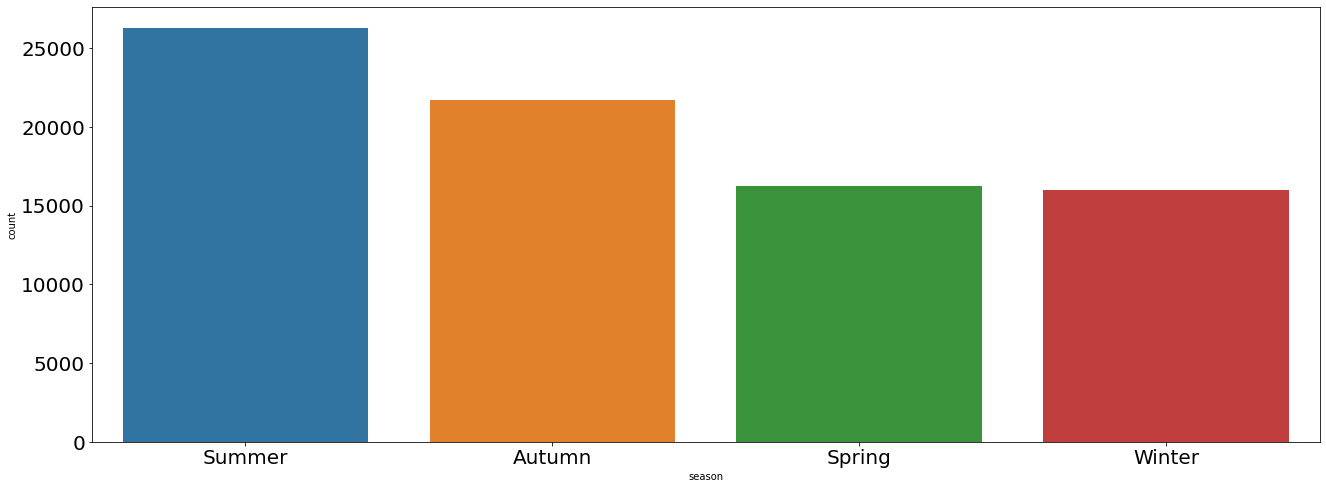

In [25]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="season", data=ufo_df, order=ufo_df['season'].value_counts().index)

## At what hour are ufos most frequent?

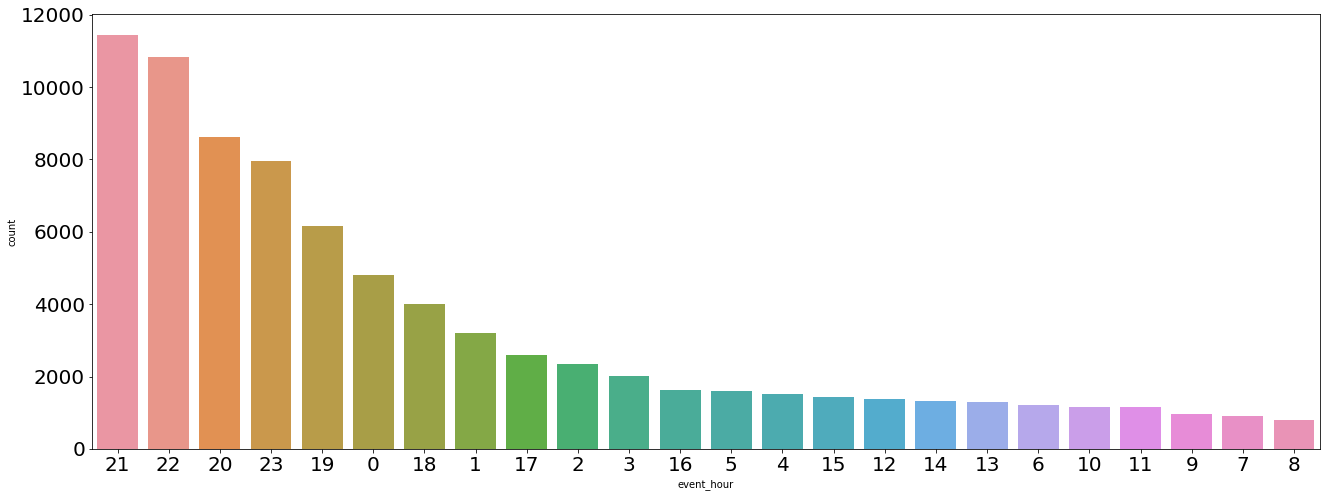

In [26]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="event_hour", data=ufo_df, order=ufo_df['event_hour'].value_counts().index)

## In which days of the week are ufos most frequent?

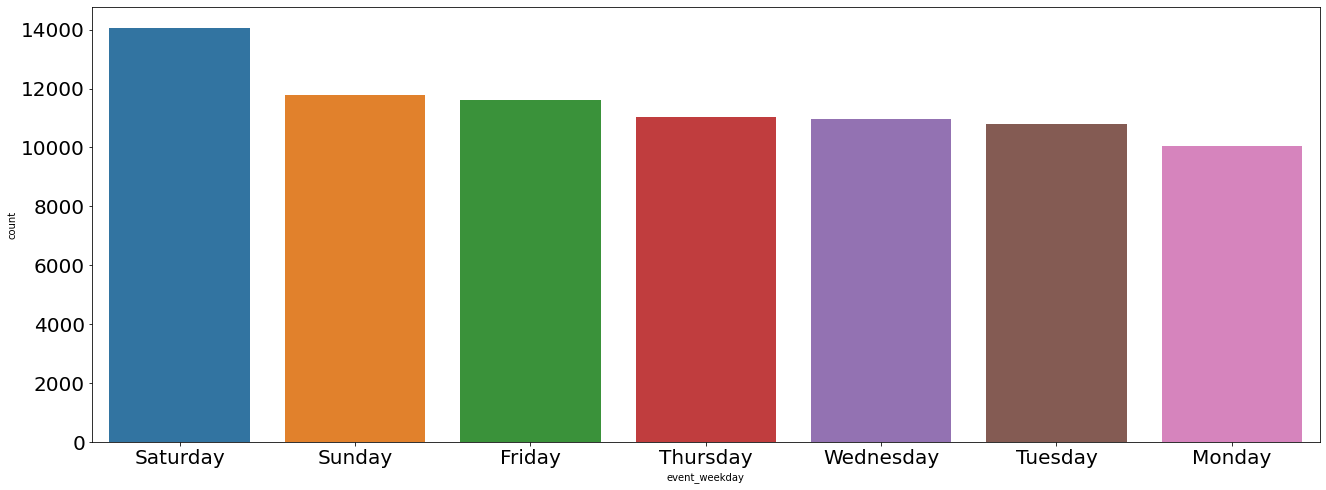

In [27]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="event_weekday", data=ufo_df, order=ufo_df['event_weekday'].value_counts().index)

## In what years of the week are ufos most frequent? (20 years span from 2012)

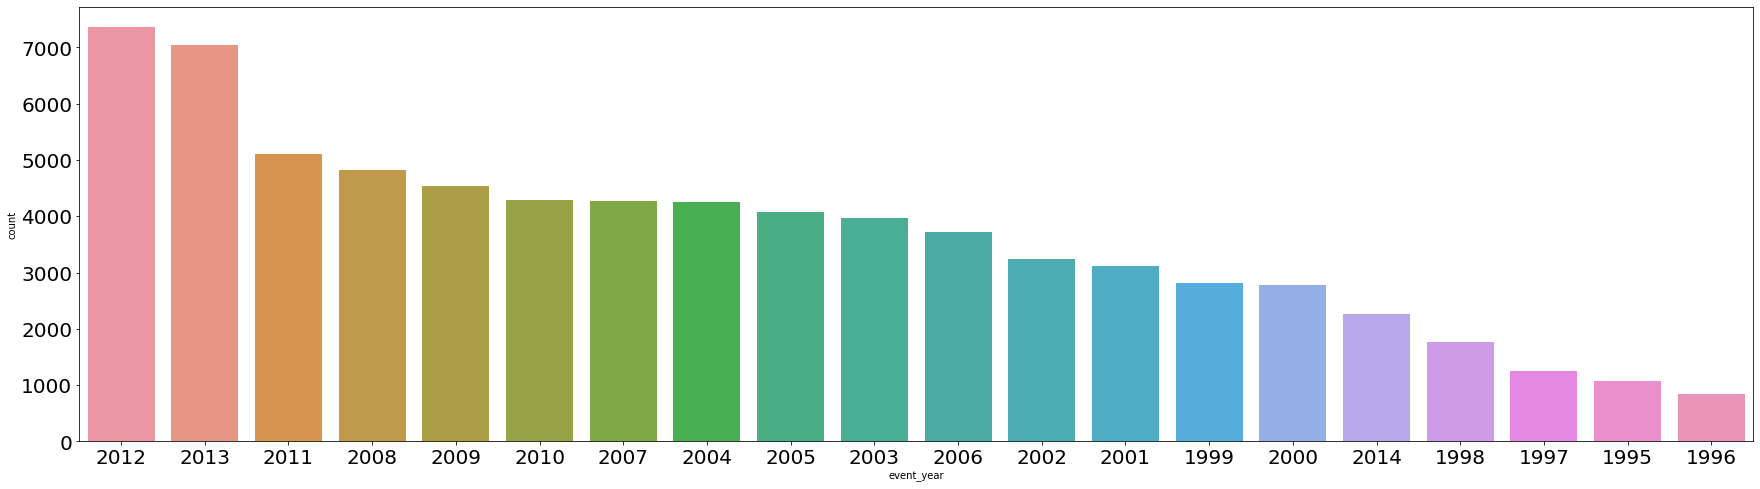

In [28]:
plt.subplots(figsize=(30,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="event_year", data=ufo_df, order=ufo_df['event_year'].value_counts().index[:20])

## In what countries are ufos most frequent?

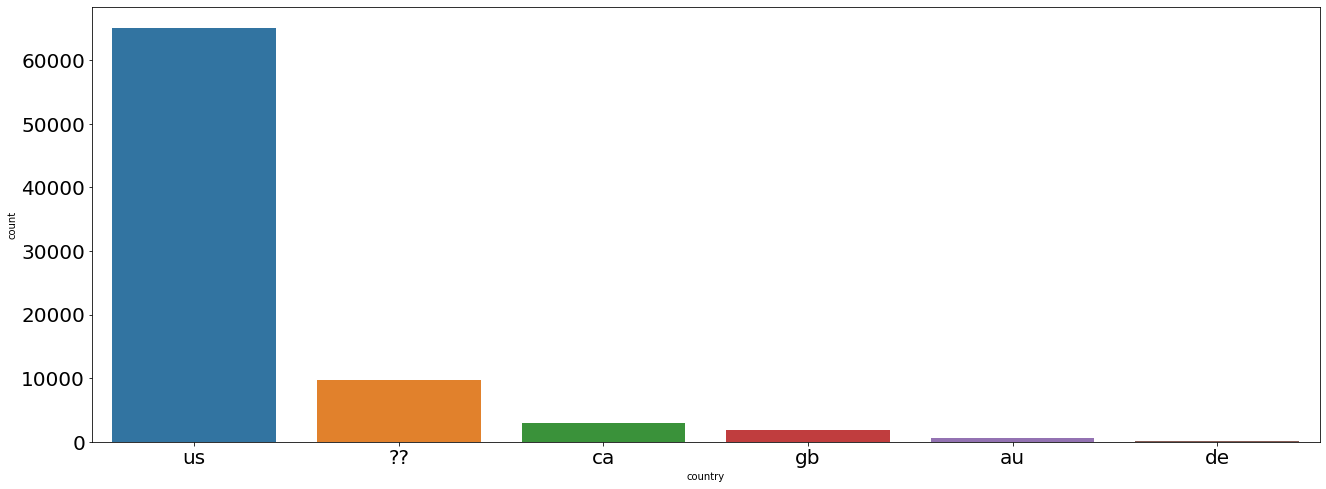

In [29]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="country", data=ufo_df, order=ufo_df['country'].value_counts().index)

## In what states are ufos frequent?

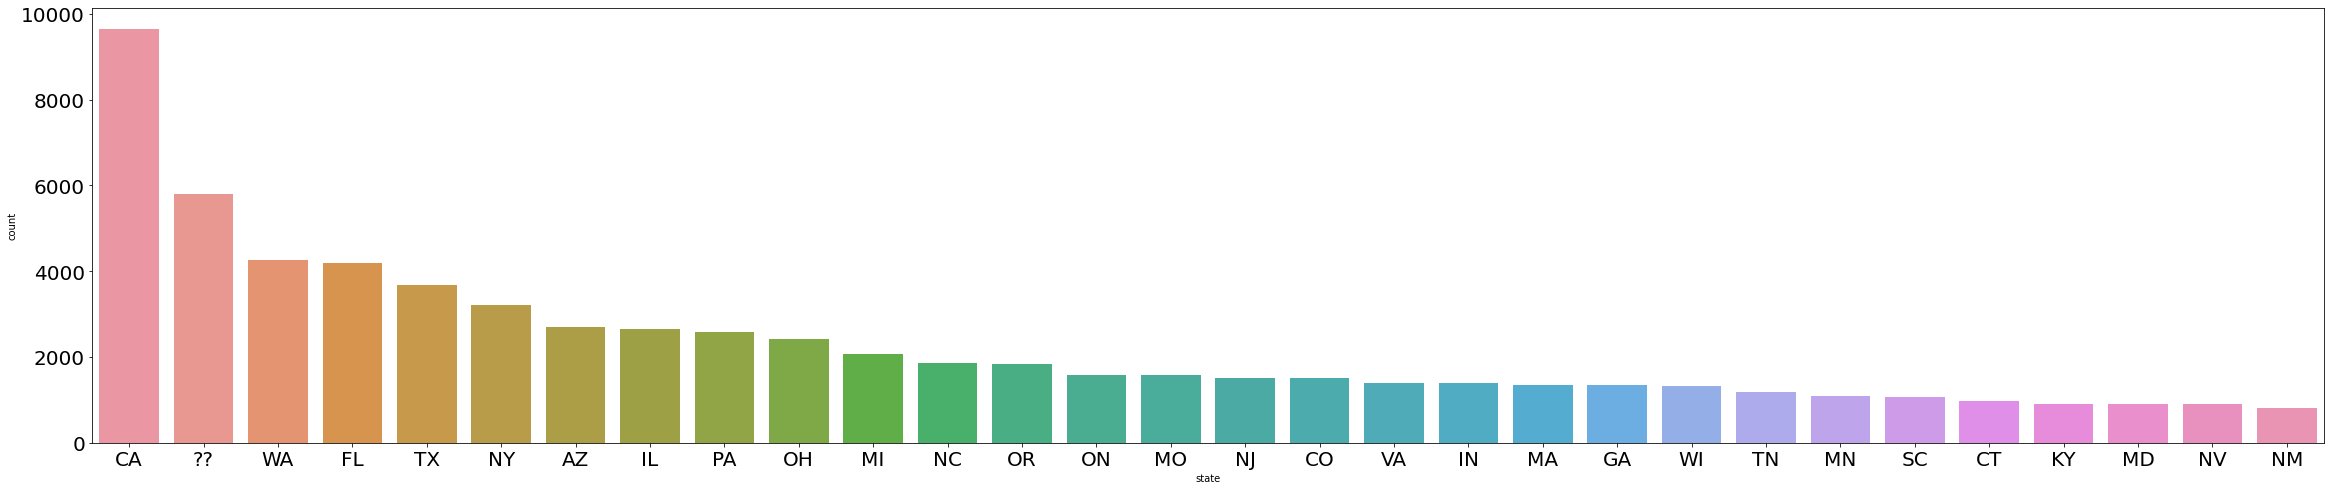

In [30]:
plt.subplots(figsize=(40,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="state", data=ufo_df, order=ufo_df['state'].value_counts().index[:30])

## What shapes do ufo have?

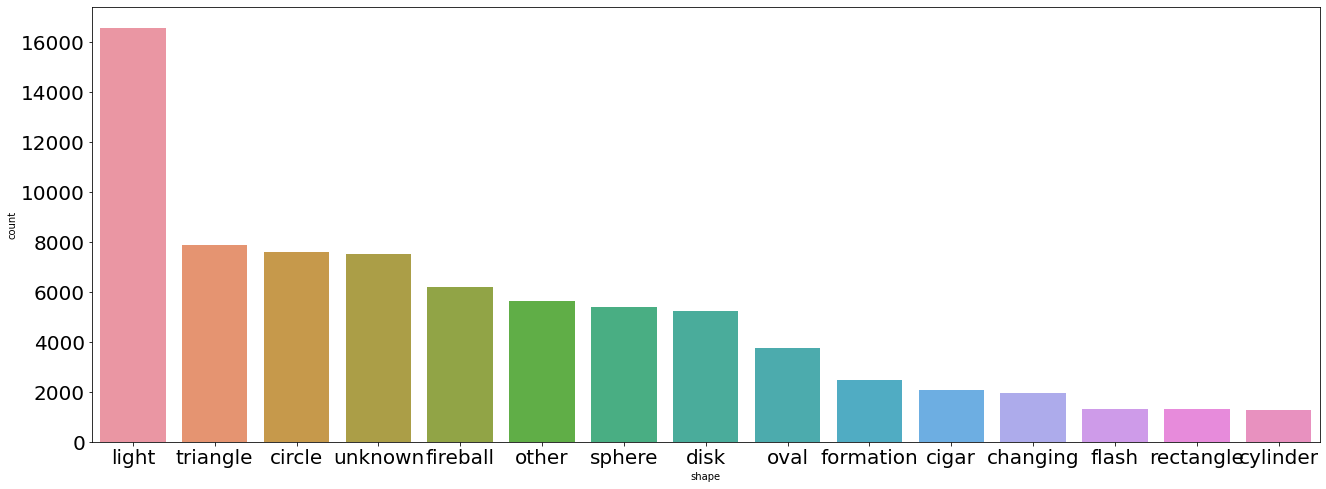

In [31]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="shape", data=ufo_df, order=ufo_df['shape'].value_counts().index[:15])

## What colors are the ufos?

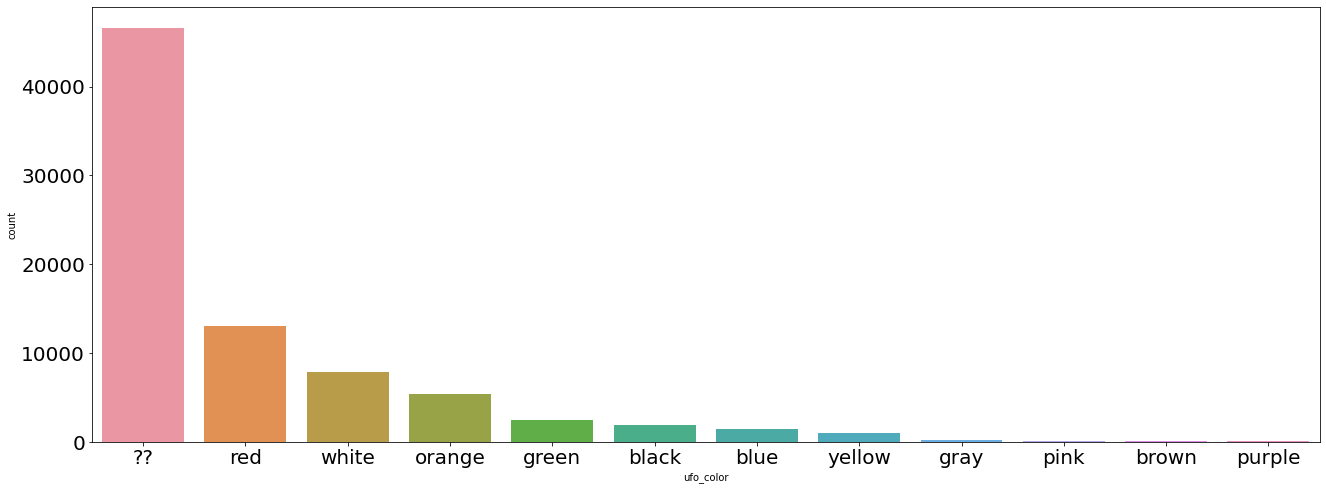

In [32]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="ufo_color", data=ufo_df, order=ufo_df['ufo_color'].value_counts().index[:15])

## How many seconds does an encounter last?

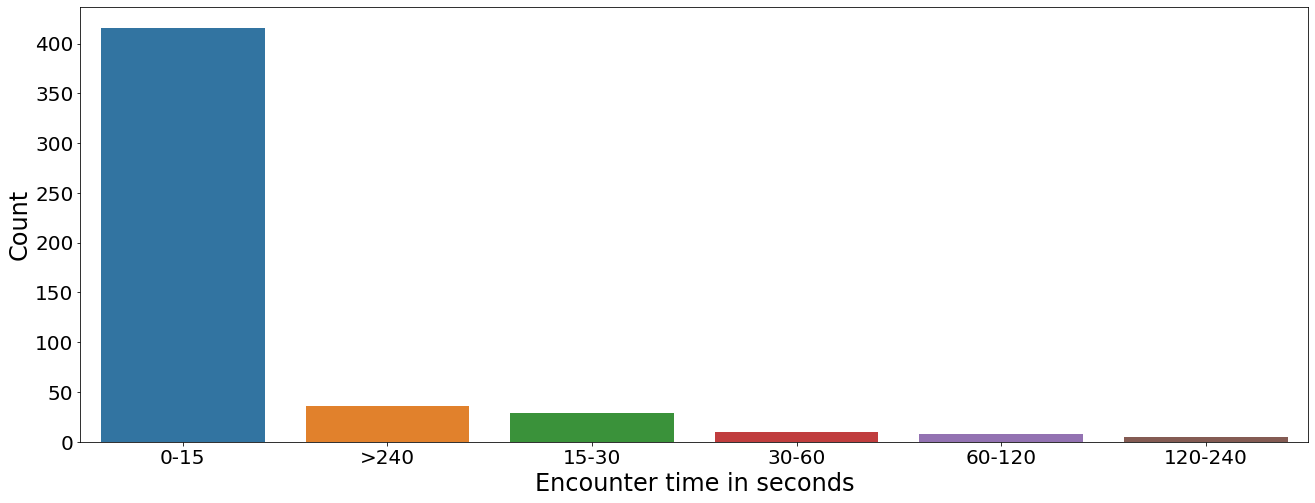

In [33]:
plt.subplots(figsize=(22,8))
duration_sec = [i for i in ufo_df["duration_seconds"].value_counts()]
duration_sec_list = []
for i in duration_sec:
    if i in range(0,16):
        duration_sec_list.append("0-15")
    if i in range(15,31):
        duration_sec_list.append("15-30")
    if i in range(31,61):
        duration_sec_list.append("30-60")
    if i in range(60,121):
        duration_sec_list.append("60-120")
    if i in range(120,241):
        duration_sec_list.append("120-240")
    if i > 240:
        duration_sec_list.append(">240")
        
duration_sec_list = pd.Series(duration_sec_list)
di = duration_sec_list.value_counts().index
dv = duration_sec_list.value_counts().values
sns.barplot(x=di,y=dv)

plt.xlabel("Encounter time in seconds",fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel("Count",fontsize=24)
plt.yticks(fontsize=20)

plt.show()

## Season VS Weekday

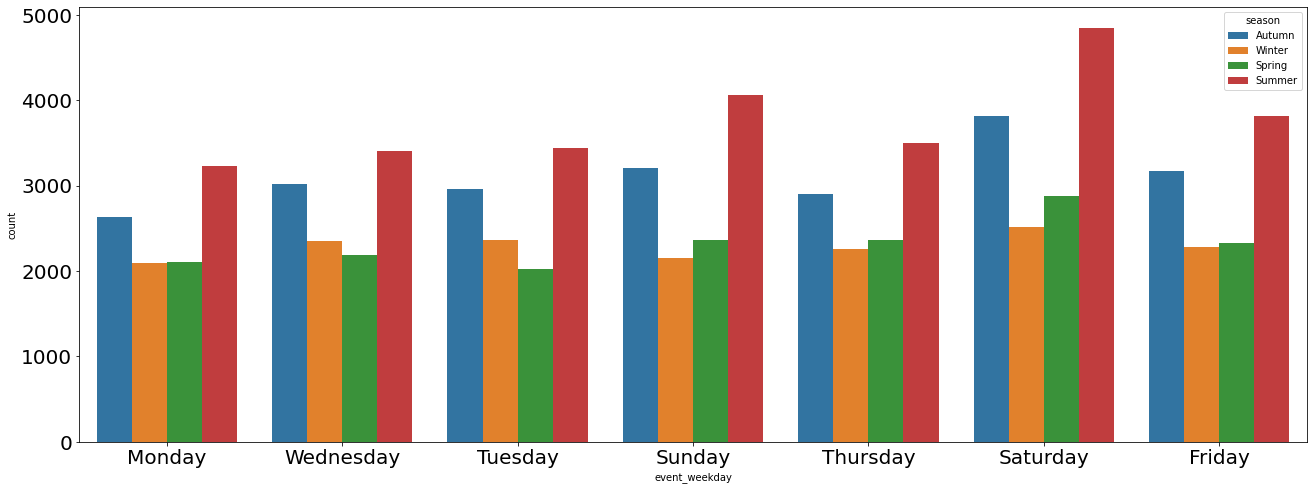

In [34]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = sns.countplot(x="event_weekday", hue="season", data=ufo_df)

## Shape VS Season

<AxesSubplot:xlabel='season', ylabel='count'>

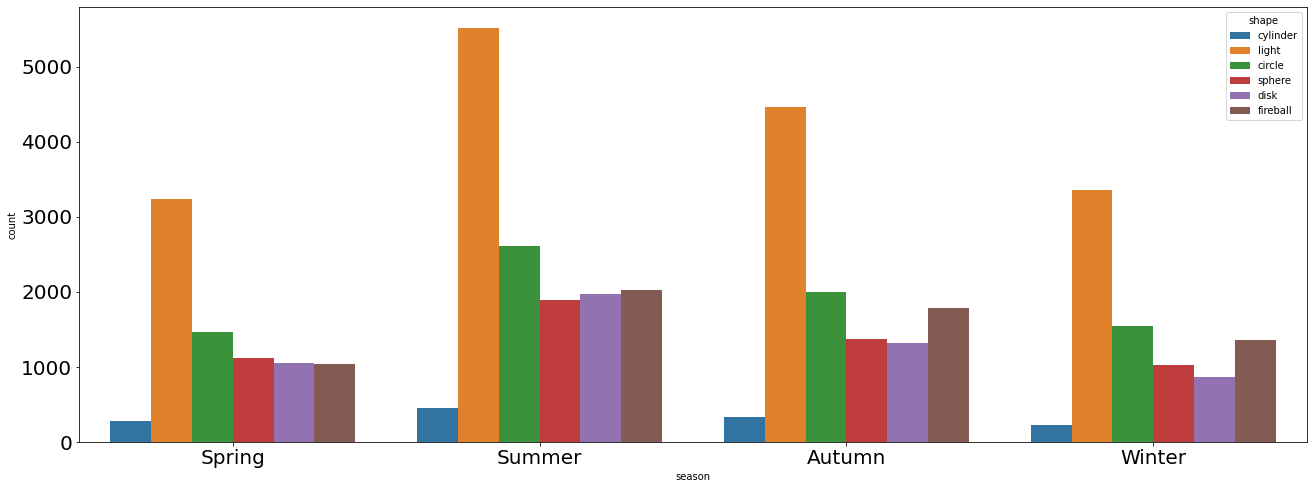

In [35]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.countplot(x="season", hue="shape", order=['Spring', 'Summer', 'Autumn', 'Winter'], hue_order=['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball'], data=ufo_df)

## Shape VS Color

<AxesSubplot:xlabel='ufo_color', ylabel='count'>

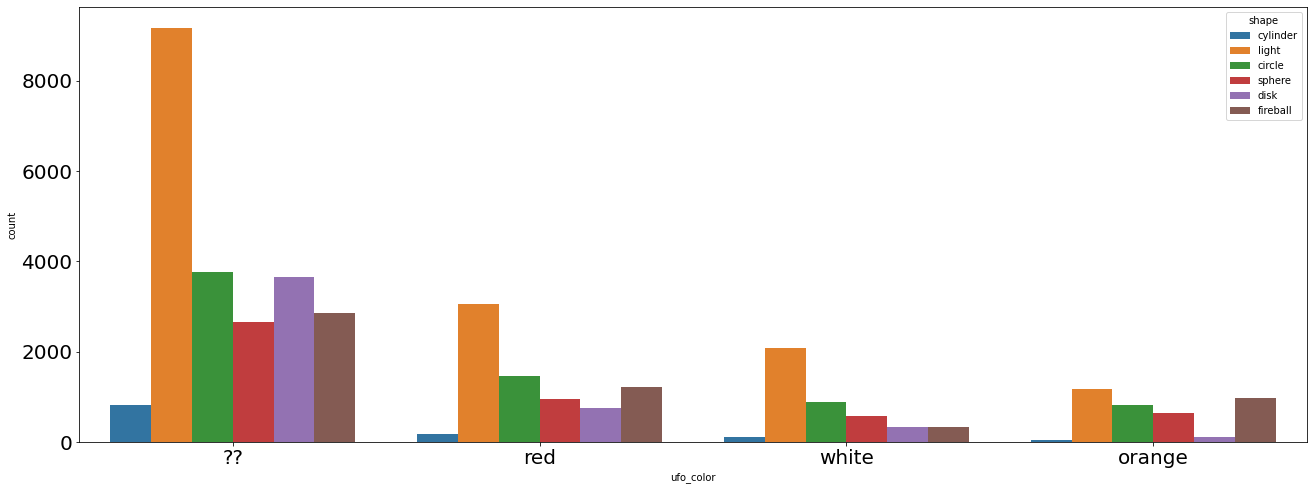

In [36]:
plt.subplots(figsize=(22,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.countplot(x="ufo_color", hue="shape", order=['??', 'red', 'white', 'orange'], hue_order=['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball'], data=ufo_df)

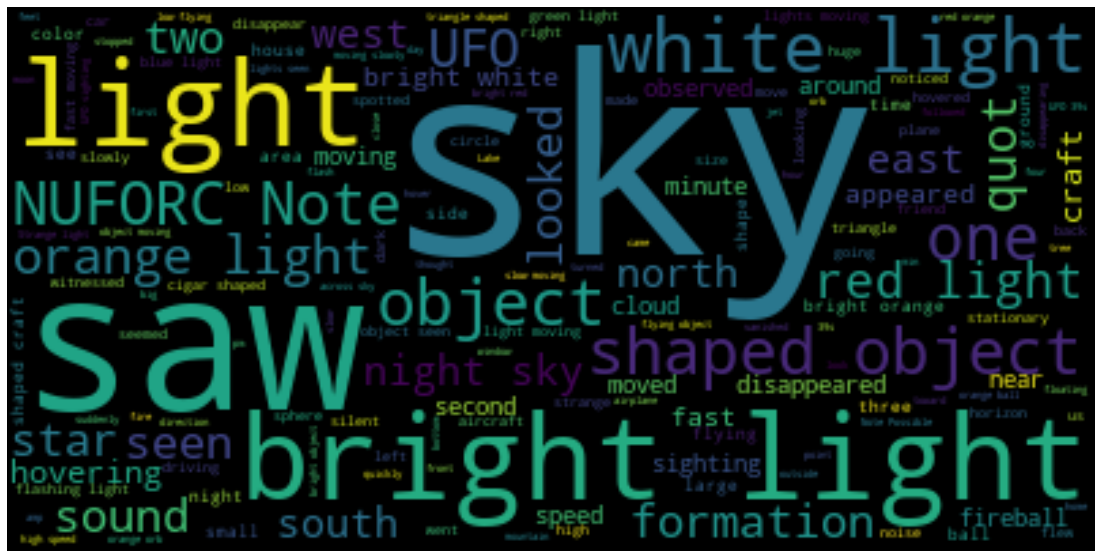

In [37]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(' '.join(ufo_df['comments']))

plt.subplots(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
ufo_df.columns

Index(['datetime', 'year', 'city', 'state', 'country', 'shape',
       'duration_seconds', 'duration_hours', 'comments', 'date_posted',
       'latitude', 'longitude', 'datetime_dtformat', 'clean_comments',
       'season', 'ufo_color', 'event_year', 'event_weekday', 'event_hour'],
      dtype='object')

In [39]:
pickle.dump(ufo_df, open('./data/ufo_df.pickle', 'wb'))
%store ufo_df

Stored 'ufo_df' (DataFrame)


## Are aliens really trying to contact us? Is the government hiding something? Let's find out!

### Lets look into all military bases in the US

In [40]:
militarybase_data = pd.read_csv('data/military_bases.csv', sep = ';')
militarybase_data.head(2)

Geo Point  \
0  36.6032534708,-121.912105279   
1  18.4127920097,-66.1214794902   

                                           Geo Shape  OBJECTID_1  OBJECTID  \
0  {"type": "Polygon", "coordinates": [[[-121.896...          48       105   
1  {"type": "Polygon", "coordinates": [[[-66.1153...          88       637   

      COMPONENT             Site Name Joint Base   State Terr        COUNTRY  \
0   Army Active  Presidio of Monterey        NaN   California  United States   
1  Army Reserve         Fort Buchanan        NaN  Puerto Rico    Puerto Rico   

  Oper Stat  PERIMETER      AREA    Shape_Leng    Shape_Area  
0    Active   4.351336  0.610378   9080.019355  2.457794e+06  
1    Active   7.450958  1.151803  12589.594748  3.331642e+06

In [41]:
militarybase_data = militarybase_data.rename(columns={'Site Name': 'Site_Name'})
militarybase_data = militarybase_data.rename(columns={'Geo Point': 'Geo_Point'})
militarybase_data['Geo_Tuple'] = militarybase_data['Geo_Point'].apply(lambda x : tuple(map(float, x.split(','))))

In [42]:
militarybase_data['Geo Point List'] = militarybase_data['Geo_Point'].apply(lambda x : x.split(sep = ','))
militarybase_data['latitude'] = militarybase_data['Geo Point List'].apply(lambda x: x[0] )
militarybase_data['longtitude'] = militarybase_data['Geo Point List'].apply(lambda x: x[1] )

In [43]:
ufo_df = ufo_df.rename(columns={'longitude': 'longtitude'})
ufo_df['Geo_Tuple'] = ufo_df[ ['latitude', 'longtitude'] ].values.tolist()
ufo_df['Geo_Tuple'] = ufo_df['Geo_Tuple'].apply(lambda x : tuple(x))

### Lets only take ufo data from the states

In [44]:
us_states = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

# UFO sightings in United States only (70,805 rows)
ufo_df = ufo_df[ufo_df['state'].isin(us_states)].sort_values('year')
ufo_df = ufo_df[(ufo_df.latitude > 15) & (ufo_df.longtitude < -65)]
ufo_df = ufo_df[(ufo_df.latitude > 50) & (ufo_df.longtitude > -125) == False]
ufo_df = ufo_df[ufo_df['city'].str.contains('\(Canada\)|\(Mexico\)') == False]

In [45]:

fig = go.Figure()

trace_data_military = go.Scattergeo(
        lon = militarybase_data['longtitude'],
        lat = militarybase_data['latitude'],
        name = "Military Bases",
        text= militarybase_data['Site_Name'],
        mode = 'markers',
                                marker = dict(
                                            size = 13,
                                            opacity = 0.75,
                                            color = 'rgb(141, 99, 255)',
                                            line = dict(color = 'rgb(255, 255, 255)', width = 1)),
        )

trace_data_ufo = go.Scattergeo(
        lon = ufo_df['longtitude'],
        lat = ufo_df['latitude'],
        name = "UFO sightings",
        text= ufo_df['datetime'],
        mode = 'markers',
                                marker = dict(
                                            size = 3.5,
                                            opacity = 0.75,
                                            color = 'rgb(0, 163, 81)',
                                            line = dict(color = 'rgb(255, 255, 255)', width = 1)),
        )

fig.update_layout(
        title = 'Military Bases and UFO sightings',
        geo_scope='usa',
    )

data = [trace_data_military, trace_data_ufo]

# figure = dict(data = data, layout = layout)
# iplot(figure)

In [46]:

fig = go.Figure()

trace_data_military = go.Scattergeo(
        lon = militarybase_data['longtitude'],
        lat = militarybase_data['latitude'],
        name = "Military Bases",
        text= militarybase_data['Site_Name'],
        mode = 'markers',
                                marker = dict(
                                            size = 13,
                                            opacity = 0.75,
                                            color = 'rgb(141, 99, 255)',
                                            line = dict(color = 'rgb(255, 255, 255)', width = 1)),
        )

trace_data_ufo = go.Scattergeo(
        lon = ufo_df['longtitude'],
        lat = ufo_df['latitude'],
        name = "UFO sightings",
        text= ufo_df['datetime'],
        mode = 'markers',
                                marker = dict(
                                            size = 3.5,
                                            opacity = 0.75,
                                            color = 'rgb(0, 163, 81)',
                                            line = dict(color = 'rgb(255, 255, 255)', width = 1)),
        )

fig.update_layout(
        title = 'Military Bases and UFO sightings',
        geo_scope='usa',
    )

data = [trace_data_military, trace_data_ufo]

# figure = dict(data = data, layout = layout)
# iplot(figure)

# If there are many real alien UFO sightings, they should have no correlation with the distance to the nearest military base!

### Compute distance from each sighting to nearest base

In [47]:
# Function: distance between two coordinates

import math

def distance_geo_coo(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    distance_km = 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    return distance_km

In [48]:
# Example of finding closest point between two locations on the planed loc1(lat1,lon1), loc2(lat2,lon2)

R = 6373.0

lat1 = 52.2296756
lon1 = 21.0122287

lat2 = 52.406374
lon2 = 16.9251681

c1 = lat1,lon1
c2 = lat2, lon2

distance_geo_coo(c1, c2)

278.54558935106706

In [49]:
# Create dictionary with the name of the base and the geolocation in lat and long

military_location_dict = dict(zip(militarybase_data.Site_Name, militarybase_data.Geo_Tuple) )
                              
military_location_dict                         

print(military_location_dict['Presidio of Monterey'] )

(36.6032534708, -121.912105279)


In [50]:
# Function that takes a location( coord1 , coord2 ), and the millitary 
# base dictionar and scans for the closest base in the dict

def closest_base(location, location_dict,mod):
    closest_location = None
    for city in location_dict.keys():
        distance = distance_geo_coo(location, location_dict[city])
        if closest_location is None:
            closest_location = (city, distance)
        elif distance < closest_location[1]:
            closest_location = (city, distance)
    name_site, distance = closest_location
    if mod == 'name':
        return name_site
    if mod == 'distance':
        return distance

### Lets test some examples according to the map!

In [51]:
# Example of finding closest point inside base dictionary

# look up military base coordinates closeby: Boise Air Terminal
# https://goo.gl/maps/io1ctS84BrkCxJjn6

test = (44.053597812599115, -116.12254832876721) # Should be Boise Air Terminal'


test = (35, -116.26700072568501) # should be NAWS china lake
test = (47,-99)                  # Should be NG Camp Grafton

name_site = closest_base(test, military_location_dict, 'name')
print(name_site)

distance = closest_base(test, military_location_dict, 'distance')
print(distance)

NG Camp Grafton
88.40339696546964


### Lets make two columns with nearest military base and distance

In [52]:
# Use function above to compute nearest base name for each UFO sighting

ufo_df['military_base_name'] = ufo_df['Geo_Tuple'].apply(lambda x : closest_base(x, military_location_dict, 'name'))

ufo_df['military_base_dist'] = ufo_df['Geo_Tuple'].apply(lambda x : closest_base(x, military_location_dict, 'distance'))

### UFO's or military objects?

#### Distribution is skewed towards lesser distance to closest military base; are we onto something?!

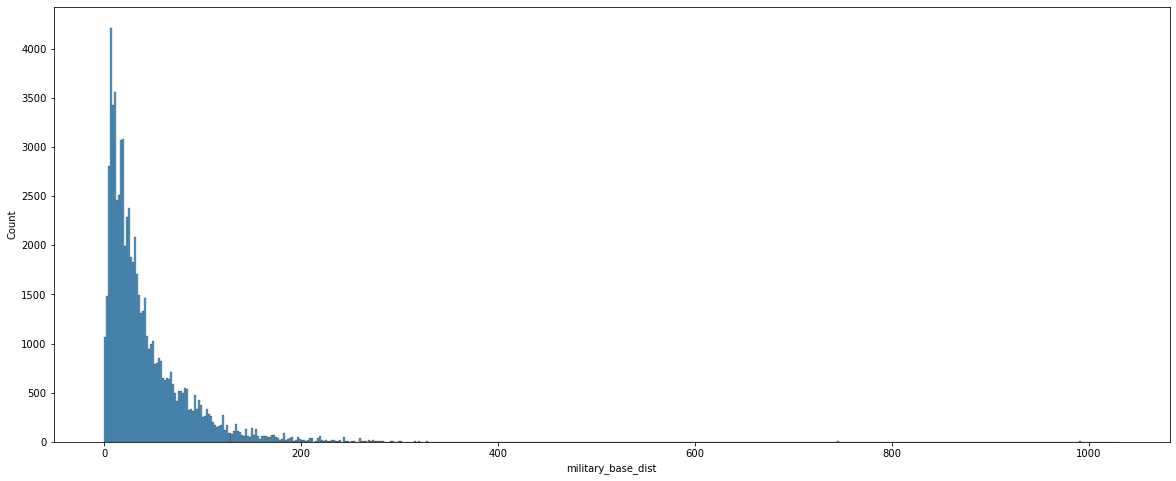

In [53]:
from matplotlib import pyplot
import seaborn

plt.subplots(figsize=(20,8))
ax = seaborn.histplot(ufo_df['military_base_dist'])

# Predict based on object

In [54]:
# machine learning
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection  import *
from sklearn.linear_model  import *

In [55]:
# machine learning
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection  import *
from sklearn.linear_model  import *

### Preprocessing

In [56]:
ufo_df.columns

Index(['datetime', 'year', 'city', 'state', 'country', 'shape',
       'duration_seconds', 'duration_hours', 'comments', 'date_posted',
       'latitude', 'longtitude', 'datetime_dtformat', 'clean_comments',
       'season', 'ufo_color', 'event_year', 'event_weekday', 'event_hour',
       'Geo_Tuple', 'military_base_name', 'military_base_dist'],
      dtype='object')

In [57]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

ufo_df_num = ufo_df.select_dtypes(include=numerics)

ufo_df_num.head(3)

year  duration_seconds   latitude  longtitude  event_year  event_hour  \
14868     0               600  38.453120  -85.670241        2004           0   
43727     0                60  39.569722  -75.048056        2008           0   
35114     0                 2  27.143889  -80.200833        1998           0   

       military_base_dist  
14868            5.596096  
43727           37.523653  
35114           20.218901

In [58]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

ufo_df_num = ufo_df.select_dtypes(include=numerics)

ufo_df_num.head(3)

year  duration_seconds   latitude  longtitude  event_year  event_hour  \
14868     0               600  38.453120  -85.670241        2004           0   
43727     0                60  39.569722  -75.048056        2008           0   
35114     0                 2  27.143889  -80.200833        1998           0   

       military_base_dist  
14868            5.596096  
43727           37.523653  
35114           20.218901

In [59]:
column_names = ufo_df_num.columns
column_names

Index(['year', 'duration_seconds', 'latitude', 'longtitude', 'event_year',
       'event_hour', 'military_base_dist'],
      dtype='object')

In [60]:
ufo_df.columns

Index(['datetime', 'year', 'city', 'state', 'country', 'shape',
       'duration_seconds', 'duration_hours', 'comments', 'date_posted',
       'latitude', 'longtitude', 'datetime_dtformat', 'clean_comments',
       'season', 'ufo_color', 'event_year', 'event_weekday', 'event_hour',
       'Geo_Tuple', 'military_base_name', 'military_base_dist'],
      dtype='object')

### Predict the shape of the ufo based on color/season/closest military base

<AxesSubplot:>

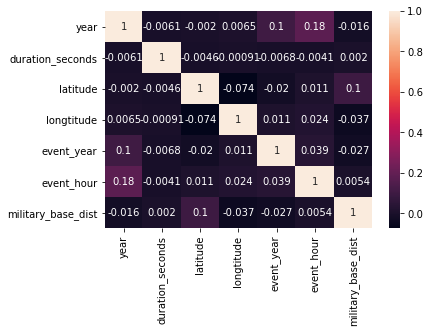

In [65]:
corrMatrix = ufo_df.corr()
sns.heatmap(corrMatrix, annot=True)

In [68]:
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn import *
from sklearn.preprocessing import *

colored_ufo_df = ufo_df[ufo_df['ufo_color'] != '??']

features = ['ufo_color', 'season', 'event_hour', 'shape', 'military_base_name']
target = 'shape'

colored_ufo_df = colored_ufo_df[features]
colored_ufo_df = pd.get_dummies(data=colored_ufo_df, columns=['season', 'ufo_color'])

labelEnc = preprocessing.LabelEncoder()
labelEnc.fit(list(set(colored_ufo_df['shape'])))
colored_ufo_df['shape_enc'] = labelEnc.transform(colored_ufo_df['shape'])

labelEnc = preprocessing.LabelEncoder()
labelEnc.fit(list(set(colored_ufo_df['military_base_name'])))
colored_ufo_df['military_base_enc'] = labelEnc.transform(colored_ufo_df['military_base_name'])


X_train, X_test, y_train, y_test = train_test_split(colored_ufo_df.drop(['shape', 'shape_enc', 'military_base_name'], axis = 1), \
                                                    colored_ufo_df[target], \
                                                    test_size=0.2, \
                                                    random_state=2010)

pipeline = Pipeline([('scaler', StandardScaler()), \
                    ('clsf', svm.SVC())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test)

0.24119015957446807

In [ ]:
from sklearn import model_selection

grid_param = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

grid_search_classifier = model_selection.GridSearchCV(estimator=svm.SVC(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)
grid_search_classifier

grid_search_classifier.fit(X_train, y_train)

/opt/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



### Predict distance to military base

In [ ]:
import pickle
from sklearn import linear_model
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

from sklearn.preprocessing import *
from sklearn.decomposition import*
from sklearn.neighbors import*

In [ ]:
X_train, X_test, y_train, y_test = pickle.load(open('./data/split/split.pickle', 'rb'))

y_test